In [65]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [66]:
model_info = [
'Aord_size',
 'Themes_size',
 'num_nodes',
 'num_pnode',
 'num_onode',
 'num_edge',
 'max_given_themes_num',
 'num_propvar',
 'max_given_logics_num',
]

constraints_names = [

    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

In [67]:
df1 = pd.read_csv("./subPC_time_data1.csv")
# df2 = pd.read_csv("./time_data_mainPC.csv")

print(df1.shape)

(118073, 50)


In [68]:
df1.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05
mean,2.76e+00,2.50e+00,4.91e+00,2.15e+00,2.76e+00,1.27e+01,1.80e+00,2.00e+00,2.63e+00,4.99e-01,9.63e-06,6.31e-06,2.64e-06,2.92e-06,5.19e-06,1.30e-03,9.41e-04,2.16e-06,1.80e-03,4.97e-03,1.00e-03,4.39e-03,8.96e-03,7.03e-02,7.80e-02,1.41e-01,1.92e-03,4.62e-03,3.92e+00,1.57e+00
std,2.49e+00,1.12e+00,2.86e+00,1.84e+00,2.49e+00,1.63e+01,8.99e-01,8.14e-01,9.64e-01,2.43e-01,9.80e-06,3.20e-06,7.92e-07,1.72e-06,6.87e-06,4.32e-03,1.74e-03,6.45e-07,2.49e-03,1.06e-02,2.73e-03,9.35e-03,1.59e-02,4.09e-01,4.51e-01,6.47e-01,4.29e-03,1.53e-02,3.42e+01,1.11e+01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,9.54e-07,9.54e-07,7.15e-07,0.00e+00,0.00e+00,0.00e+00,2.62e-06,7.15e-07,1.67e-06,9.06e-06,4.77e-06,4.77e-06,1.67e-06,4.77e-06,4.77e-06,4.05e-06,7.15e-07,7.15e-07,-6.49e-01,2.86e-06
25%,1.00e+00,2.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,2.00e+00,3.75e-01,5.01e-06,3.81e-06,1.91e-06,1.19e-06,1.91e-06,6.20e-06,8.77e-05,1.91e-06,1.31e-04,1.16e-04,1.00e-05,3.79e-05,2.44e-04,4.12e-05,3.60e-05,1.76e-04,6.01e-05,5.01e-06,4.28e-04,1.19e-05
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,2.00e+00,2.00e+00,3.00e+00,5.00e-01,6.91e-06,5.96e-06,2.86e-06,2.86e-06,2.15e-06,8.70e-05,2.41e-04,2.15e-06,7.75e-04,8.49e-04,1.98e-05,5.86e-04,2.26e-03,3.22e-04,2.61e-04,2.63e-03,2.05e-04,8.30e-05,4.15e-03,3.64e-03
75%,4.00e+00,4.00e+00,7.00e+00,3.00e+00,4.00e+00,1.80e+01,2.00e+00,3.00e+00,3.00e+00,6.25e-01,1.10e-05,8.11e-06,3.10e-06,4.05e-06,5.96e-06,4.15e-04,9.39e-04,2.15e-06,2.51e-03,4.58e-03,5.60e-04,3.88e-03,9.74e-03,6.60e-03,7.13e-03,3.33e-02,1.43e-03,2.01e-03,1.76e-01,1.49e-01
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.80e+01,4.00e+00,3.00e+00,4.00e+00,1.00e+00,1.18e-04,5.89e-05,1.81e-05,2.48e-05,1.28e-04,1.44e-01,4.17e-02,5.32e-05,4.94e-02,3.63e-01,4.40e-02,1.15e-01,2.43e-01,2.20e+01,1.94e+01,3.30e+01,9.67e-02,7.34e-01,2.12e+03,8.47e+02


Text(0.5, 1.0, 'distribution of bit_representation_ratio')

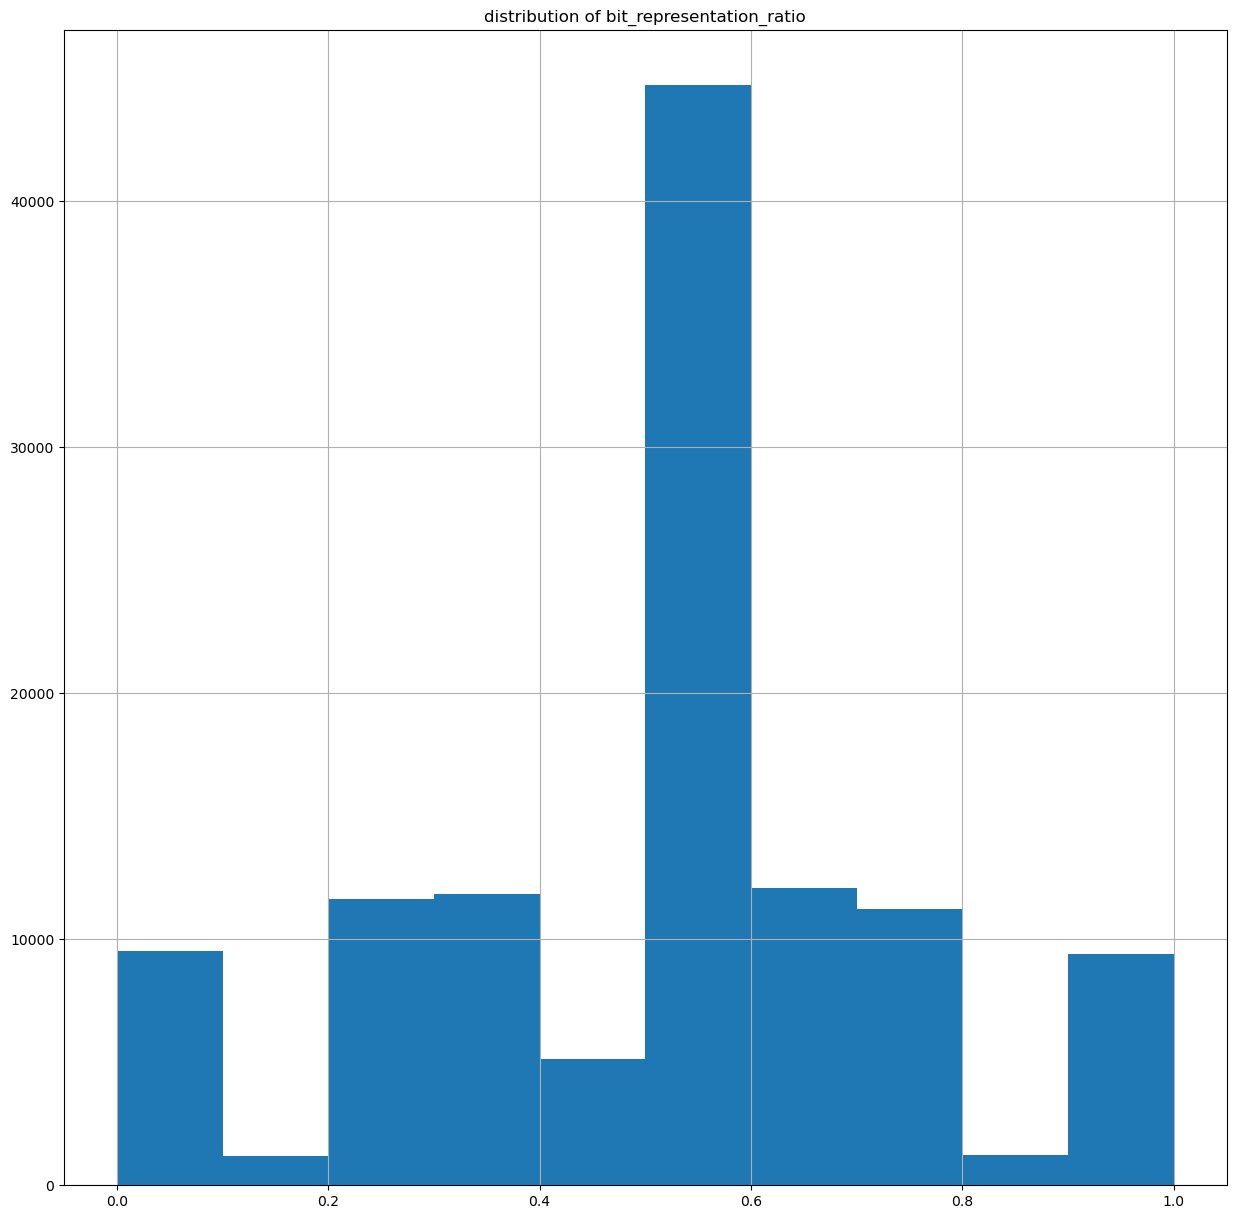

In [69]:
df1.loc[:,"bit_representation_ratio"].hist()

plt.title("distribution of bit_representation_ratio")

In [70]:
del df1

# Read and roughly check the data.

In [71]:
df = pd.read_csv("./subPC_time_data1.csv")

In [72]:
# bool -> int

for name in constraints_names:
    df[f"{name}_TF"] = df[f"{name}_TF"] * 1


In [73]:
df.shape # データ件数,列数

(118073, 50)

In [74]:
df.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05,1.18e+05
mean,2.76e+00,2.50e+00,4.91e+00,2.15e+00,2.76e+00,1.27e+01,1.80e+00,2.00e+00,2.63e+00,4.99e-01,9.63e-06,4.70e-01,6.31e-06,6.60e-01,2.64e-06,3.75e-01,2.92e-06,6.96e-01,5.19e-06,2.50e-01,1.30e-03,2.04e-01,9.41e-04,3.10e-02,2.16e-06,6.79e-02,1.80e-03,1.76e-01,4.97e-03,1.78e-01,1.00e-03,1.20e-01,4.39e-03,2.19e-01,8.96e-03,2.62e-01,7.03e-02,6.74e-01,7.80e-02,6.67e-01,1.41e-01,4.89e-01,1.92e-03,2.46e-01,4.62e-03,2.90e-01,3.92e+00,7.07e-01,1.57e+00,7.13e-01
std,2.49e+00,1.12e+00,2.86e+00,1.84e+00,2.49e+00,1.63e+01,8.99e-01,8.14e-01,9.64e-01,2.43e-01,9.80e-06,4.99e-01,3.20e-06,4.74e-01,7.92e-07,4.84e-01,1.72e-06,4.60e-01,6.87e-06,4.33e-01,4.32e-03,4.03e-01,1.74e-03,1.73e-01,6.45e-07,2.52e-01,2.49e-03,3.81e-01,1.06e-02,3.83e-01,2.73e-03,3.25e-01,9.35e-03,4.13e-01,1.59e-02,4.40e-01,4.09e-01,4.69e-01,4.51e-01,4.71e-01,6.47e-01,5.00e-01,4.29e-03,4.31e-01,1.53e-02,4.54e-01,3.42e+01,4.55e-01,1.11e+01,4.52e-01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,9.54e-07,0.00e+00,9.54e-07,0.00e+00,7.15e-07,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.62e-06,0.00e+00,7.15e-07,0.00e+00,1.67e-06,0.00e+00,9.06e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,1.67e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,4.05e-06,0.00e+00,7.15e-07,0.00e+00,7.15e-07,0.00e+00,-6.49e-01,0.00e+00,2.86e-06,0.00e+00
25%,1.00e+00,2.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,2.00e+00,3.75e-01,5.01e-06,0.00e+00,3.81e-06,0.00e+00,1.91e-06,0.00e+00,1.19e-06,0.00e+00,1.91e-06,0.00e+00,6.20e-06,0.00e+00,8.77e-05,0.00e+00,1.91e-06,0.00e+00,1.31e-04,0.00e+00,1.16e-04,0.00e+00,1.00e-05,0.00e+00,3.79e-05,0.00e+00,2.44e-04,0.00e+00,4.12e-05,0.00e+00,3.60e-05,0.00e+00,1.76e-04,0.00e+00,6.01e-05,0.00e+00,5.01e-06,0.00e+00,4.28e-04,0.00e+00,1.19e-05,0.00e+00
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,2.00e+00,2.00e+00,3.00e+00,5.00e-01,6.91e-06,0.00e+00,5.96e-06,1.00e+00,2.86e-06,0.00e+00,2.86e-06,1.00e+00,2.15e-06,0.00e+00,8.70e-05,0.00e+00,2.41e-04,0.00e+00,2.15e-06,0.00e+00,7.75e-04,0.00e+00,8.49e-04,0.00e+00,1.98e-05,0.00e+00,5.86e-04,0.00e+00,2.26e-03,0.00e+00,3.22e-04,1.00e+00,2.61e-04,1.00e+00,2.63e-03,0.00e+00,2.05e-04,0.00e+00,8.30e-05,0.00e+00,4.15e-03,1.00e+00,3.64e-03,1.00e+00
75%,4.00e+00,4.00e+00,7.00e+00,3.00e+00,4.00e+00,1.80e+01,2.00e+00,3.00e+00,3.00e+00,6.25e-01,1.10e-05,1.00e+00,8.11e-06,1.00e+00,3.10e-06,1.00e+00,4.05e-06,1.00e+00,5.96e-06,1.00e+00,4.15e-04,0.00e+00,9.39e-04,0.00e+00,2.15e-06,0.00e+00,2.51e-03,0.00e+00,4.58e-03,0.00e+00,5.60e-04,0.00e+00,3.88e-03,0.00e+00,9.74e-03,1.00e+00,6.60e-03,1.00e+00,7.13e-03,1.00e+00,3.33e-02,1.00e+00,1.43e-03,0.00e+00,2.01e-03,1.00e+00,1.76e-01,1.00e+00,1.49e-01,1.00e+00
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.80e+01,4.00e+00,3.00e+00,4.00e+00,1.00e+00,1.18e-04,1.00e+00,5.89e-05,1.00e+00,1.81e-05,1.00e+00,2.48e-05,1.00e+00,1.28e-04,1.00e+00,1.44e-01,1.00e+00,4.17e-02,1.00e+00,5.32e-05,1.00e+00,4.94e-02,1.00e+00,3.63e-01,1.00e+00,4.40e-02,1.00e+00,1.15e-01,1.00e+00,2.43e-01,1.00e+00,2.20e+01,1.00e+00,1.94e+01,1.00

In [75]:
pprint.pprint([col for col in df.columns]) #　列一覧

['Aord_size',
 'Themes_size',
 'num_nodes',
 'num_pnode',
 'num_onode',
 'num_edge',
 'max_given_themes_num',
 'num_propvar',
 'max_given_logics_num',
 'bit_representation_ratio',
 'tr_time',
 'tr_TF',
 'nnp_time',
 'nnp_TF',
 'nsa_time',
 'nsa_TF',
 'kos_time',
 'kos_TF',
 'nss_time',
 'nss_TF',
 'aass_time',
 'aass_TF',
 'i_time',
 'i_TF',
 'vi_time',
 'vi_TF',
 'bat_time',
 'bat_TF',
 'pr_time',
 'pr_TF',
 'mat_time',
 'mat_TF',
 'manss_time',
 'manss_TF',
 'ss_time',
 'ss_TF',
 'esr_time',
 'esr_TF',
 'ensr_time',
 'ensr_TF',
 'eos_time',
 'eos_TF',
 'das_time',
 'das_TF',
 'nwci_time',
 'nwci_TF',
 'faD_time',
 'faD_TF',
 'faW_time',
 'faW_TF']


<AxesSubplot:xlabel='num_propvar'>

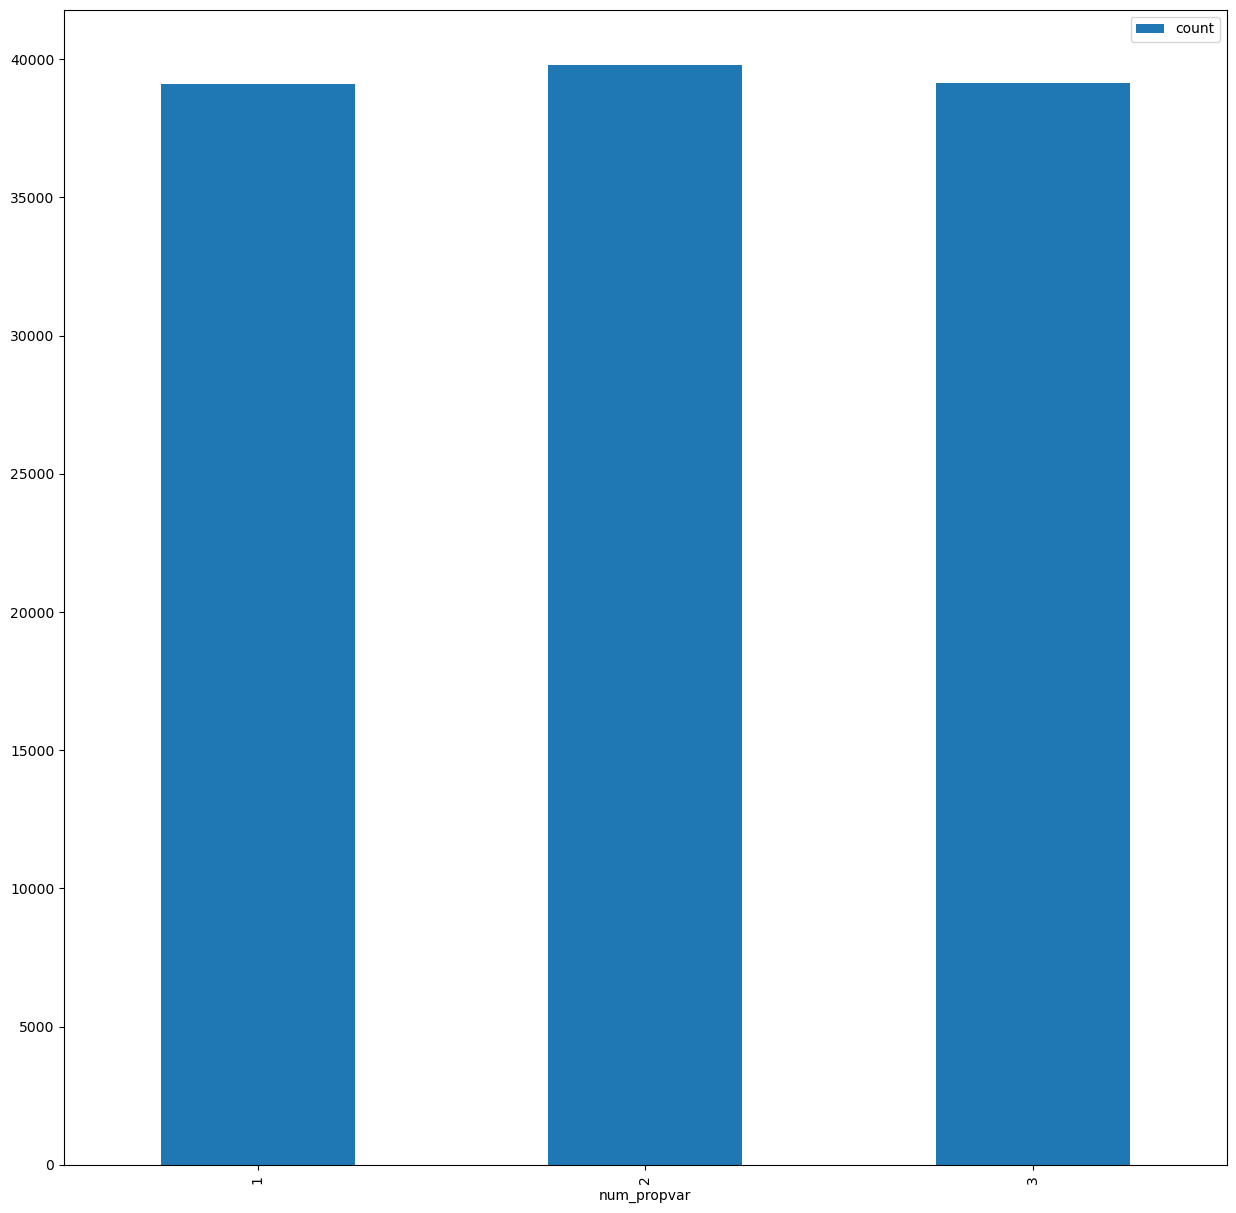

In [76]:
df.groupby("num_propvar").count()[["Aord_size"]].rename(columns={"Aord_size" : "count"}).plot.bar()

<AxesSubplot:xlabel='num_nodes'>

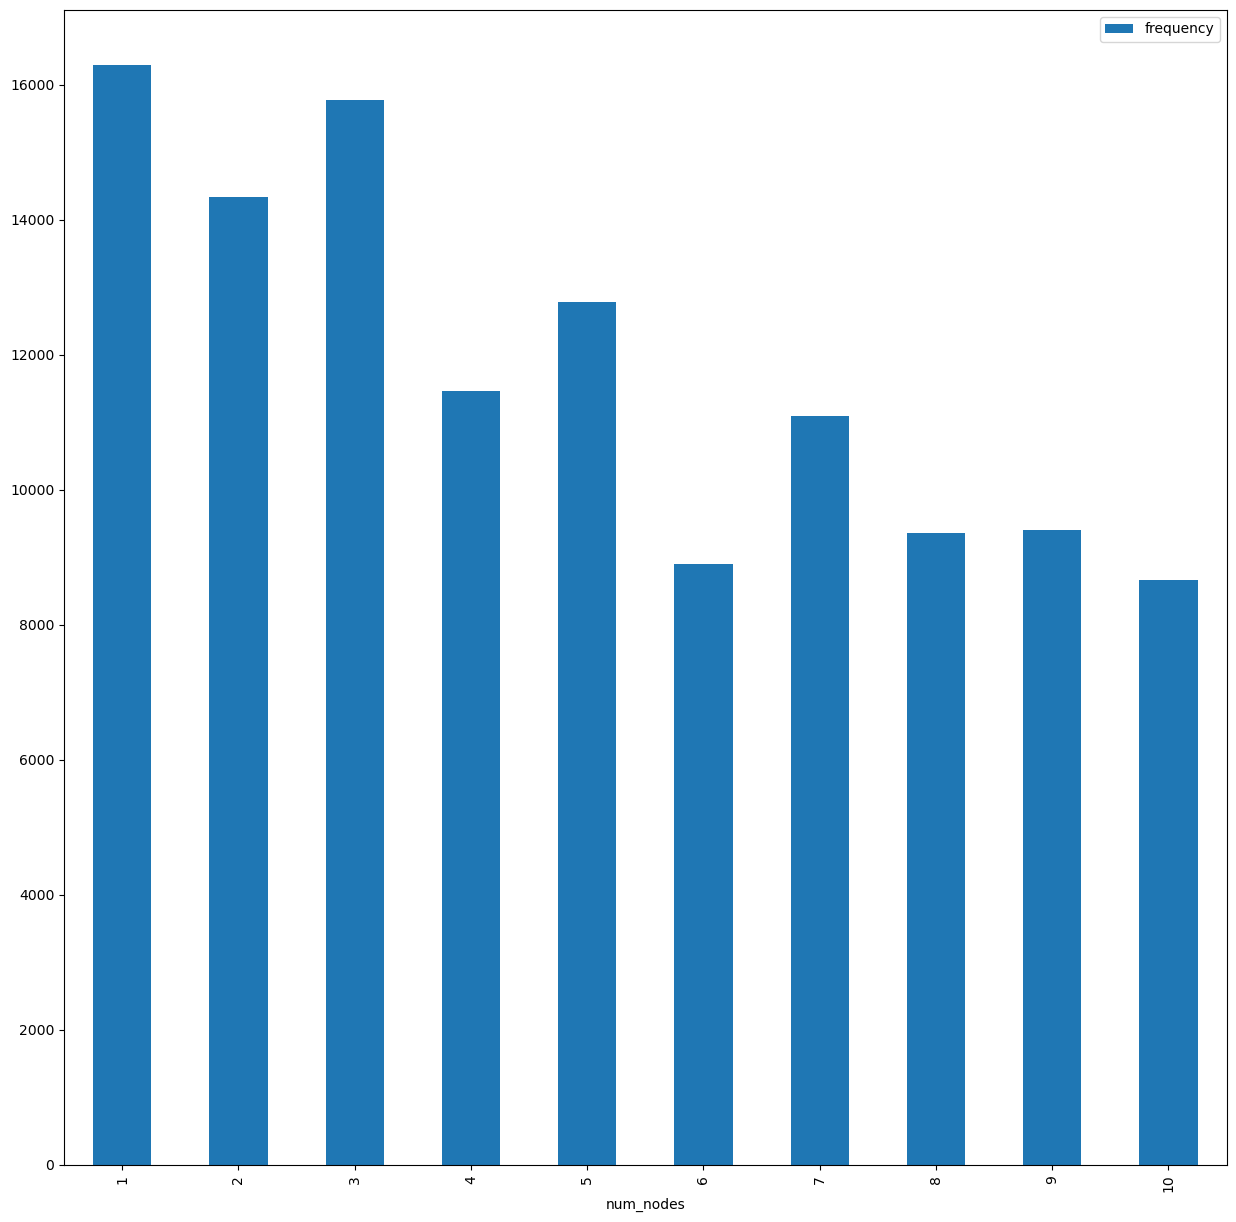

In [77]:
df.groupby("num_nodes").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='num_edge'>

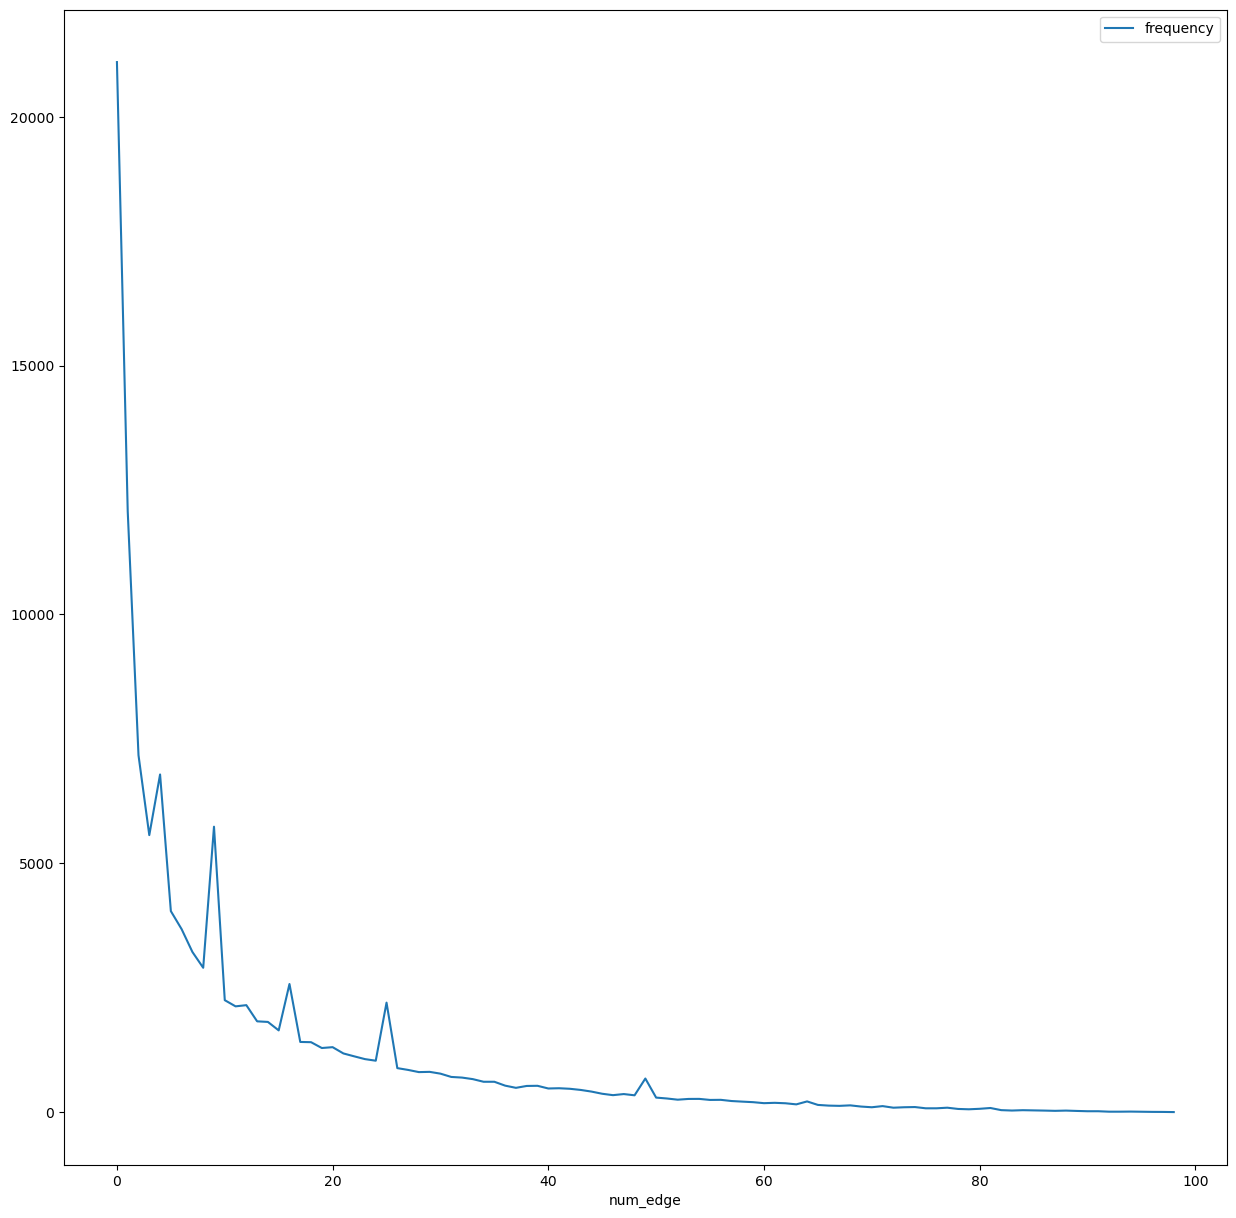

In [78]:
df.groupby("num_edge").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot()

<AxesSubplot:xlabel='Themes_size'>

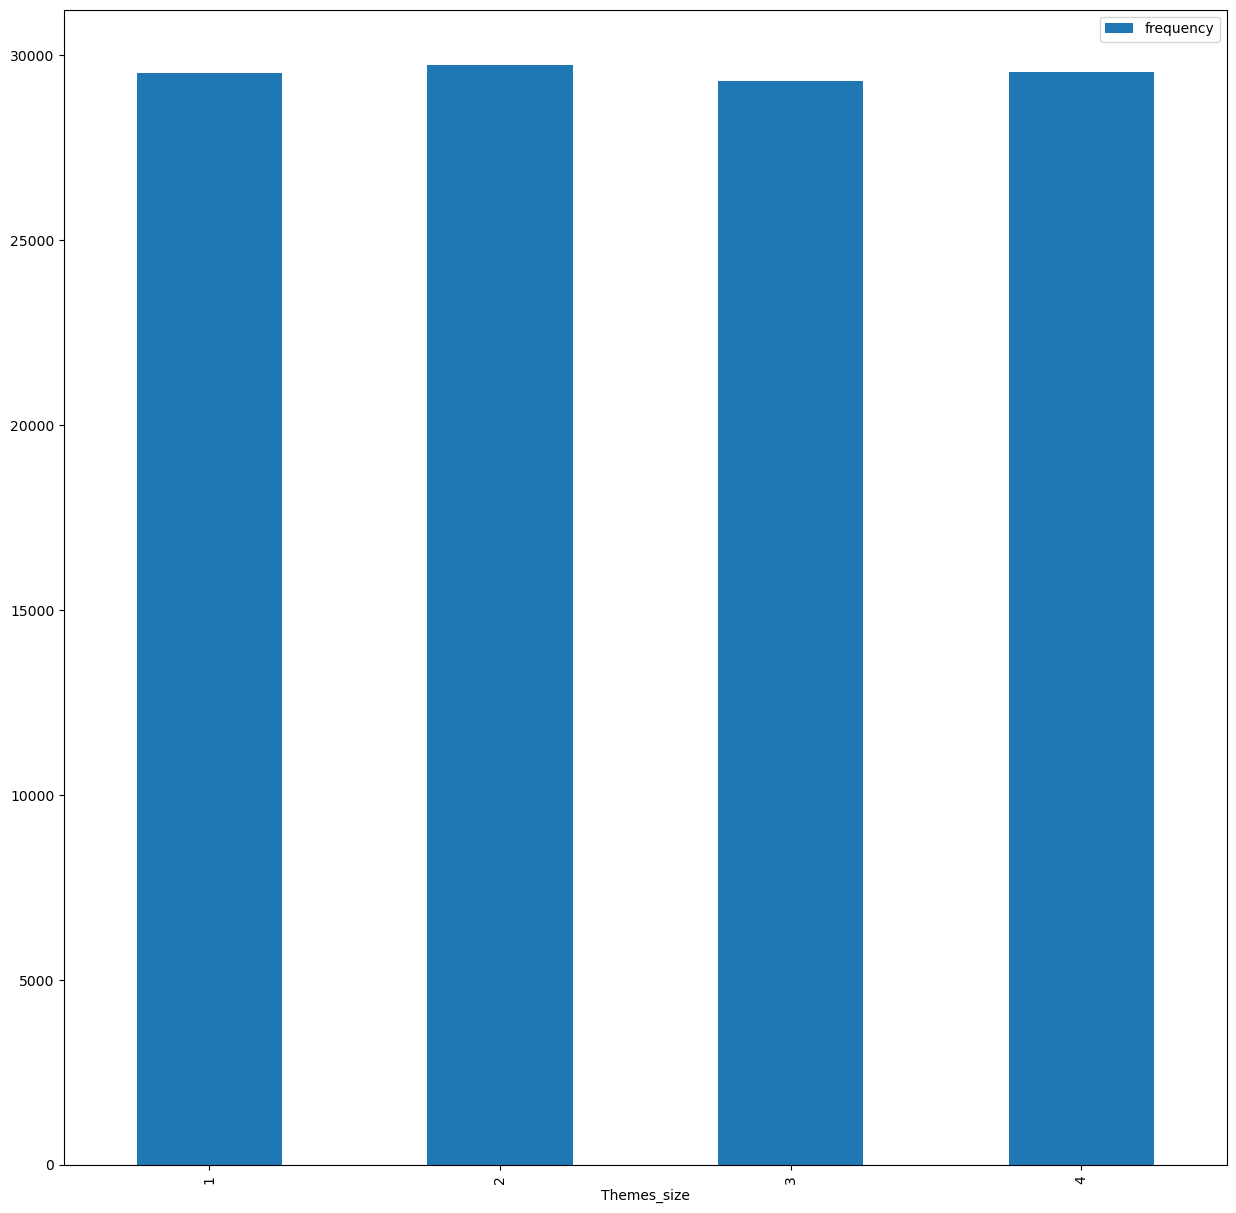

In [79]:
df.groupby("Themes_size").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='max_given_themes_num'>

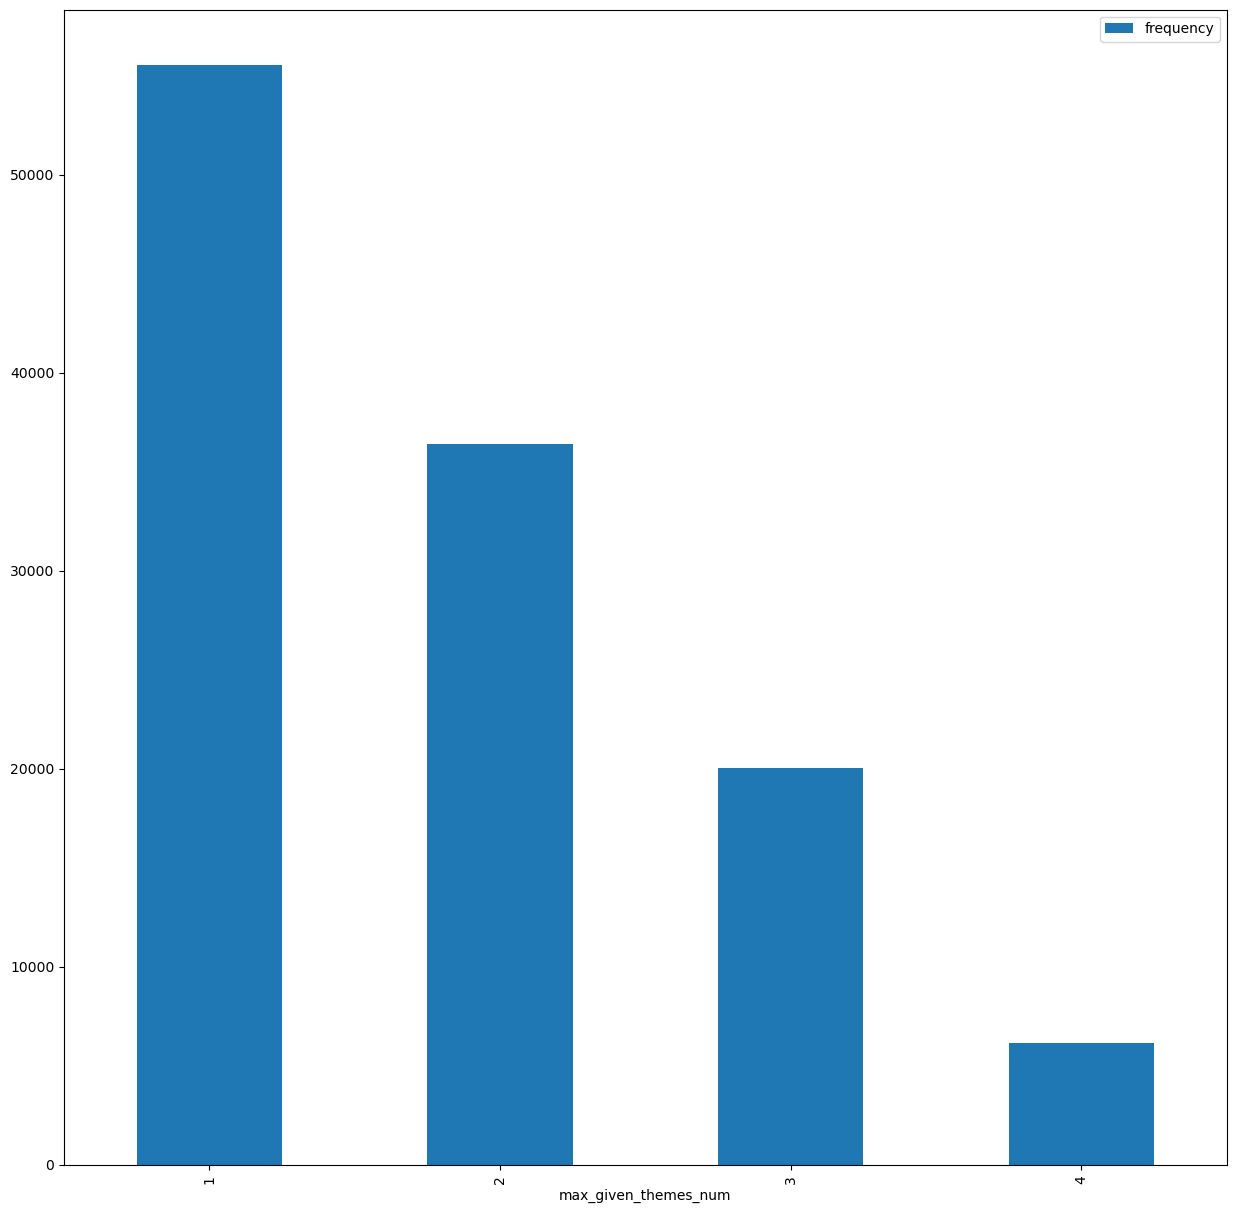

In [80]:
df.groupby("max_given_themes_num").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='max_given_logics_num'>

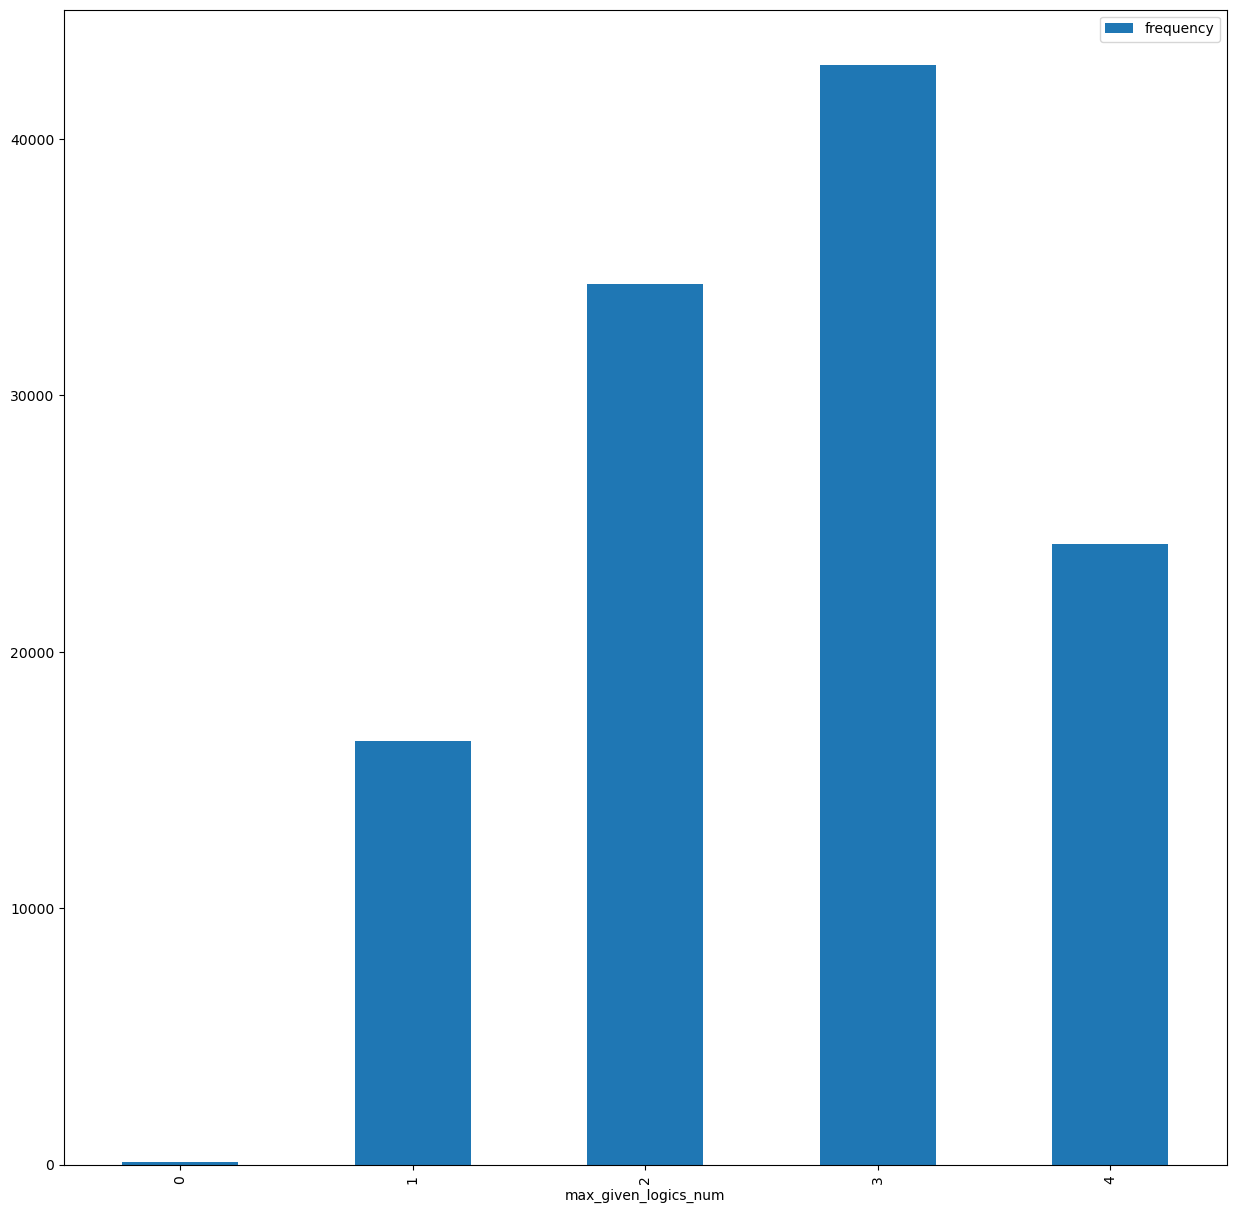

In [81]:
df.groupby("max_given_logics_num").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

In [82]:
def calc_true_ratios(df_target):

    true_ratios = list()
    for i,name in enumerate(constraints_names):
        result = (df_target.groupby(f"{name}_TF").count()[["Aord_size"]].rename(columns={"Aord_size" : "count"}))
        # print(name,result)
        false_n = result.iloc[0,0]
        true_n = result.iloc[1,0]
        assert(false_n + true_n == len(df_target))
        true_ratio  = true_n / (true_n + false_n)
        true_ratios.append( (name,true_ratio))
#     pprint.pprint(true_ratios)
    return true_ratios

print("True percentage calculated per constraint")

result = calc_true_ratios(df)
pprint.pprint(result)

True percentage calculated per constraint
[('tr', 0.470124414557096),
 ('nnp', 0.6595834780178365),
 ('nsa', 0.3746665198648294),
 ('kos', 0.6958661167243994),
 ('nss', 0.2503197174629255),
 ('aass', 0.20397550667807204),
 ('i', 0.03104011924826167),
 ('vi', 0.06785632617109755),
 ('bat', 0.17629771412600678),
 ('pr', 0.17808474418368297),
 ('mat', 0.12023070473351231),
 ('manss', 0.21870368331455964),
 ('ss', 0.26169403673998287),
 ('esr', 0.6740829825616356),
 ('ensr', 0.6670195556985933),
 ('eos', 0.4893921557002871),
 ('das', 0.24610198775333902),
 ('nwci', 0.28963437873180153),
 ('faD', 0.7066645211013526),
 ('faW', 0.7132367264319531)]


In [83]:
def experiment_with_empty_interpretation_removed():
    mask = df["max_given_logics_num"] > 0
    df_not_empty = df[mask]
    print(df.shape)
    print(df_not_empty.shape)
    
    result = calc_true_ratios(df_not_empty)
    pprint.pprint(result)
    
    return result
    
removed_result = experiment_with_empty_interpretation_removed()

result_ratio = dict()

for i in range(len(result)):
        name, r1 = result[i]
        _, r2 = removed_result[i]
        
        result_ratio[name] = (r2-r1)/r1



print("Relative change")
pprint.pprint(sorted(result_ratio.items(),key=lambda x:x[1]))



(118073, 50)
(117957, 50)
[('tr', 0.46960333002704374),
 ('nnp', 0.6592487092754139),
 ('nsa', 0.3745517434319286),
 ('kos', 0.6955670286629874),
 ('nss', 0.2499385369244725),
 ('aass', 0.2038030807836754),
 ('i', 0.030087235178921132),
 ('vi', 0.06693964749866477),
 ('bat', 0.17548767771306492),
 ('pr', 0.1772764651525556),
 ('mat', 0.11955204015022423),
 ('manss', 0.21793534932221065),
 ('ss', 0.26096797985706655),
 ('esr', 0.6737624727654993),
 ('ensr', 0.6666920996634367),
 ('eos', 0.48889001924430087),
 ('das', 0.24536059750587078),
 ('nwci', 0.2894359809082971),
 ('faD', 0.7063760522902414),
 ('faW', 0.7129547207880838)]
Relative change
[('i', -0.030698466771963254),
 ('vi', -0.013509111444103302),
 ('mat', -0.005644686062452344),
 ('bat', -0.004594707407056322),
 ('pr', -0.004538732583930298),
 ('manss', -0.0035131278115874366),
 ('das', -0.003012532544886728),
 ('ss', -0.0027744494752768496),
 ('nss', -0.0015227747231275999),
 ('tr', -0.0011083970836596486),
 ('eos', -0.0010260

# Visualize by classifying data according to whether or not constraints are met.

In [84]:
def visualizer(constraint_name : str,tf = True) :
    
    mask = df[f"{constraint_name}_TF"]  ^ (not tf)
    plt.title(f"{name} {tf} model: time distribution")
    plt.xlabel("time")
    plt.ylabel("frequency")
    df[mask][f"{constraint_name}_time"].hist()
    


In [85]:
name = "i"

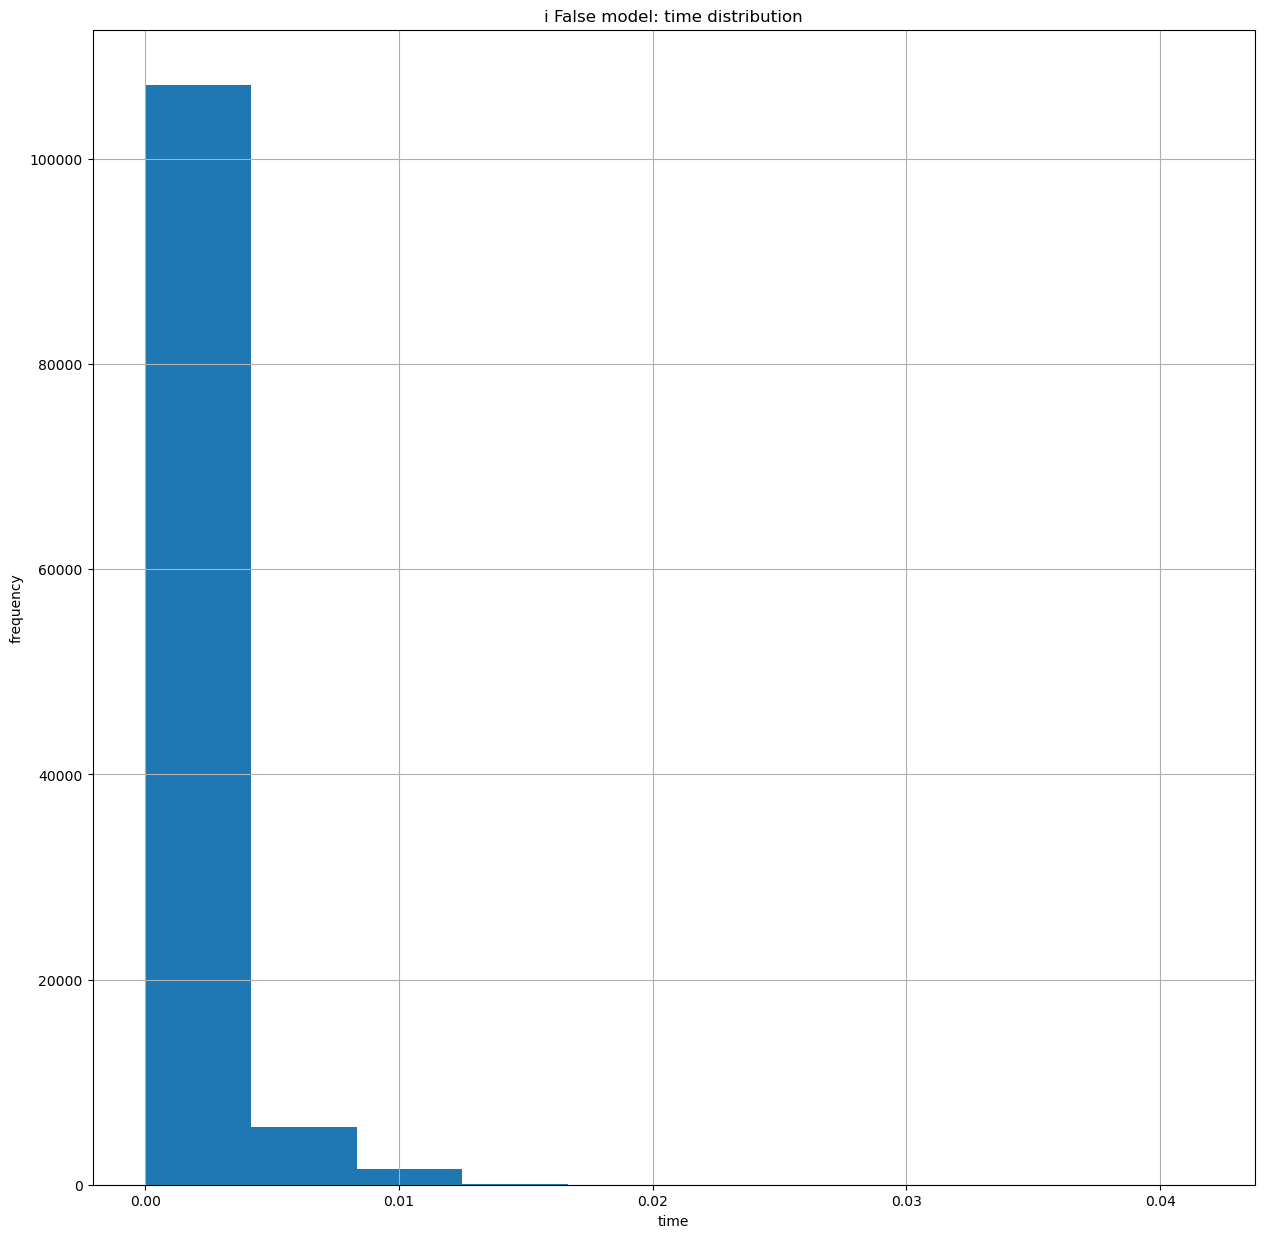

In [86]:
visualizer(name,tf=False)

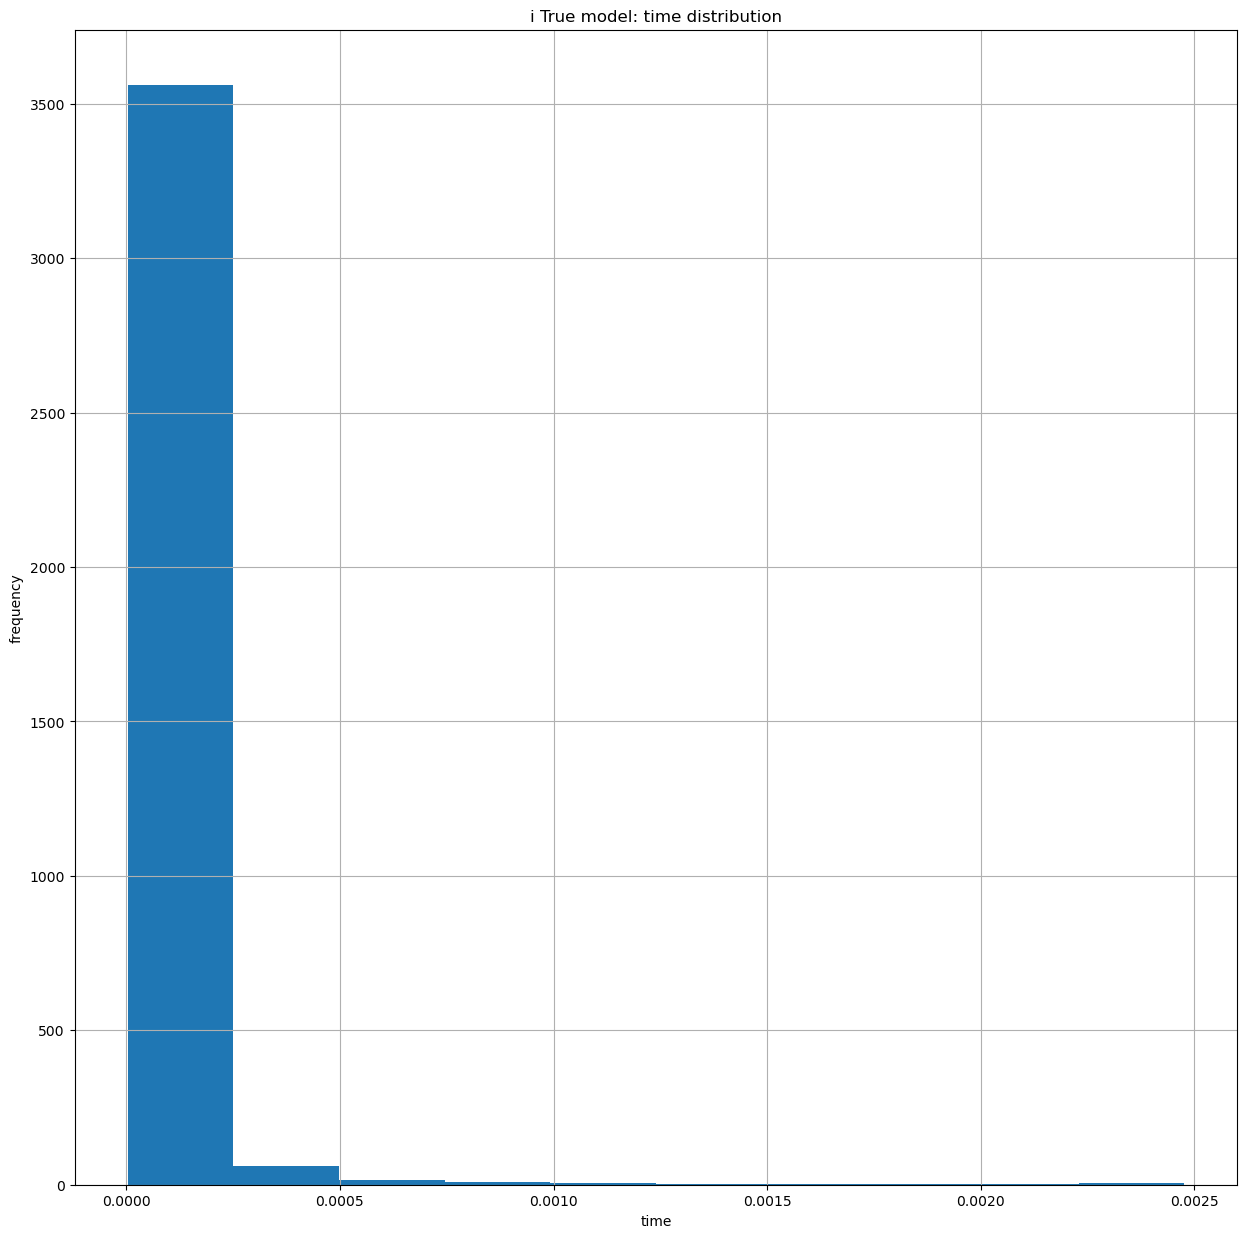

In [87]:
visualizer(name,tf=True)

# Visualization by correlation matrix of computation time

In [88]:
df_TF= df[[f"{name}_TF" for name in constraints_names]]
df_time = df[[f"{name}_time" for name in constraints_names]]

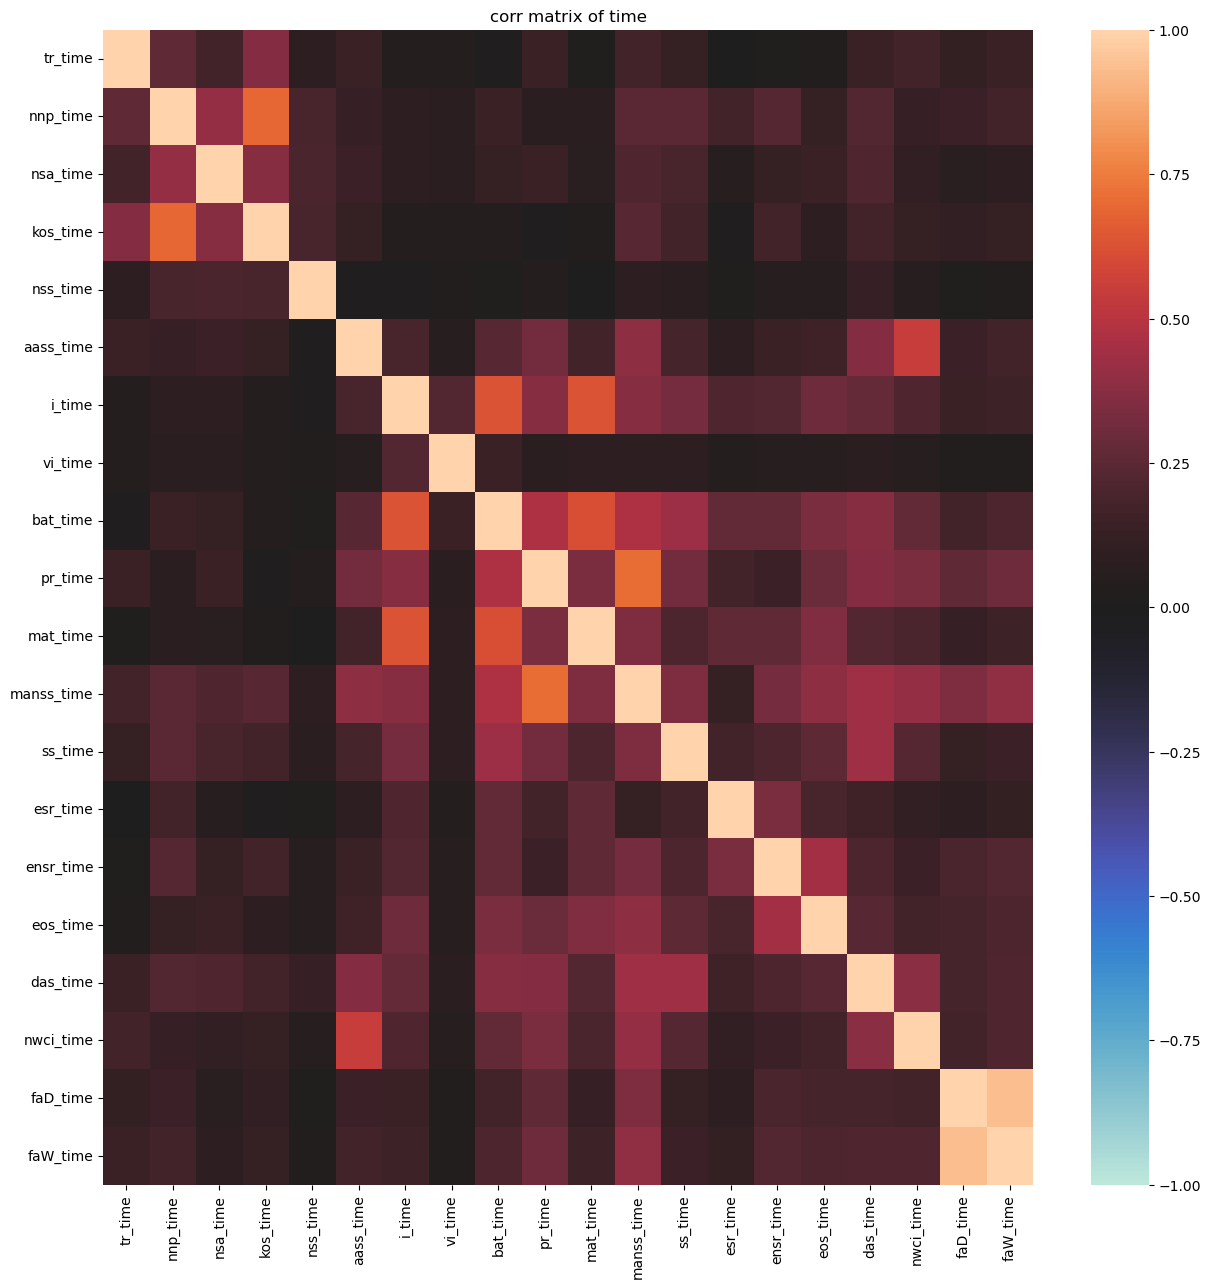

In [89]:
df_time_corr = df_time.corr()

sns.heatmap(df_time_corr,vmax=1,vmin=-1,center=0,annot=False,)
plt.title("corr matrix of time")
plt.plot()
plt.savefig("time_corr.png")
plt.show()

# Find the Cramer's coefficient of associationfor {constraint name}_TF

In [90]:
from scipy.stats import chi2_contingency

def cramersv(col1,col2,bias_correction = False):
    crosstab = np.array(pd.crosstab(col1, col2)).astype(np.float32)
    N = crosstab.sum()
    X,_,_,_ = chi2_contingency(crosstab,correction=False)
    phai = X/N
    
    k,r = crosstab.shape
    assert(k==2 and r==2)
    
    if not bias_correction:
        return np.sqrt(phai /(np.min(np.array([k,r])) - 1))
    
    phai2 = np.max(np.array([0,phai - (k-1) * (r-1) / (N-1)]) )
    k2 = k - (k-1) ** 2 / (N-1)
    r2  = r - (r-1) ** 2 / (N-1)
    
    return np.sqrt(phai2 / (np.min(np.array([k2,r2]))-1) )

print(df_TF.shape)

(118073, 20)


In [91]:
cols = df_TF.columns
cramer_matrix = np.zeros((len(cols),len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cramer_matrix[i][j] = cramersv(df_TF[cols[i]],df_TF[cols[j]])

df_cramer = pd.DataFrame({cols[i] : cramer_matrix[i]  for i in range(len(cols))},index=cols)
df_cramer

,tr_TF,nnp_TF,nsa_TF,kos_TF,nss_TF,aass_TF,i_TF,vi_TF,bat_TF,pr_TF,mat_TF,manss_TF,ss_TF,esr_TF,ensr_TF,eos_TF,das_TF,nwci_TF,faD_TF,faW_TF
tr_TF,1.00e+00,4.44e-01,3.57e-01,4.85e-01,5.03e-01,4.93e-01,1.80e-01,2.07e-01,2.71e-01,4.45e-01,3.23e-01,2.09e-01,1.75e-01,2.09e-01,3.79e-01,3.59e-01,5.05e-01,5.16e-01,2.43e-01,2.43e-01
nnp_TF,4.44e-01,1.00e+00,1.04e-01,6.62e-01,1.61e-01,1.44e-01,1.18e-01,1.04e-01,1.96e-01,2.95e-01,2.27e-01,9.14e-02,8.70e-02,2.76e-01,4.61e-01,2.09e-01,1.68e-01,1.87e-01,1.08e-01,1.08e-01
nsa_TF,3.57e-01,1.04e-01,1.00e+00,1.58e-01,6.52e-01,6.54e-01,6.25e-02,1.78e-01,7.30e-03,1.56e-01,4.61e-03,1.34e-01,1.24e-01,4.22e-02,1.67e-01,8.25e-02,6.21e-01,5.56e-01,2.80e-01,2.77e-01
kos_TF,4.85e-01,6.62e-01,1.58e-01,1.00e+00,2.48e-01,2.36e-01,1.15e-01,1.55e-01,1.78e-01,3.07e-01,2.06e-01,3.50e-01,1.52e-01,1.45e-01,6.22e-01,3.73e-01,2.59e-01,2.81e-01,1.91e-01,1.90e-01
nss_TF,5.03e-01,1.61e-01,6.52e-01,2.48e-01,1.00e+00,8.25e-01,1.29e-01,2.76e-01,2.23e-02,2.87e-01,2.87e-02,2.85e-01,1.99e-01,5.07e-02,2.58e-01,1.76e-01,7.84e-01,7.70e-01,3.44e-01,3.38e-01
aass_TF,4.93e-01,1.44e-01,6.54e-01,2.36e-01,8.25e-01,1.00e+00,9.68e-02,2.68e-01,1.04e-02,2.57e-01,1.76e-02,2.54e-01,1.72e-01,4.45e-02,2.43e-01,1.61e-01,8.02e-01,7.81e-01,3.14e-01,3.09e-01
i_TF,1.80e-01,1.18e-01,6.25e-02,1.15e-01,1.29e-01,9.68e-02,1.00e+00,2.79e-01,2.27e-01,2.73e-01,2.63e-01,1.88e-01,1.00e-01,5.68e-03,5.49e-02,6.20e-02,1.74e-01,1.16e-01,5.99e-02,5.96e-02
vi_TF,2.07e-01,1.04e-01,1.78e-01,1.55e-01,2.76e-01,2.68e-01,2.79e-01,1.00e+00,5.42e-02,2.35e-01,4.78e-02,3.05e-01,2.53e-01,4.97e-02,1.67e-01,1.59e-01,2.90e-01,2.60e-01,1.52e-01,1.50e-01
bat_TF,2.71e-01,1.96e-01,7.30e-03,1.78e-01,2.23e-02,1.04e-02,2.27e-01,5.42e-02,1.00e+00,2.32e-01,4.63e-01,3.33e-02,9.47e-02,1.14e-01,1.03e-01,1.36e-01,4.90e-02,4.99e-02,2.96e-02,3.28e-02
pr_TF,4.45e-01,2.95e-01,1.56e-01,3.07e-01,2.87e-01,2.57e-01,2.73e-01,2.35e-01,2.32e-01,1.00e+00,2.62e-01,3.93e-01,1.87e-01,1.36e-01,3.24e-01,3.31e-01,3.15e-01,3.21e-01,1.86e-01,1.84e-01


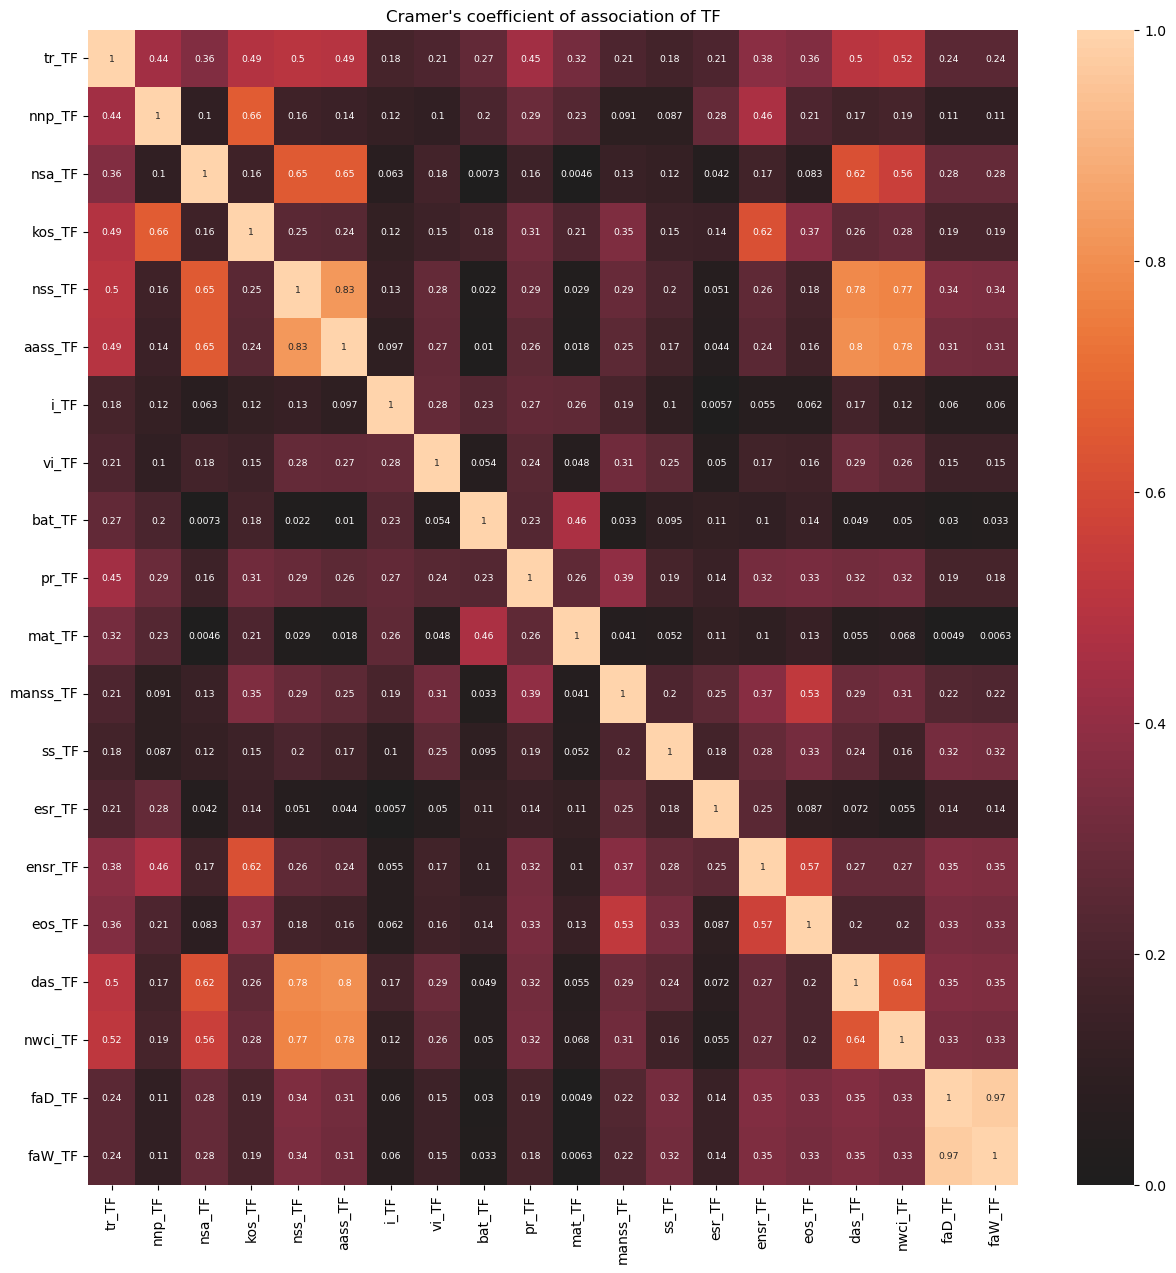

In [92]:
sns.heatmap(df_cramer,vmax=1,vmin=0,center=0,annot=True,annot_kws={"size":30 / np.sqrt(len(df_TF.corr()))},)
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Cramer's coefficient of association of TF")
plt.plot()
plt.savefig("tf_cramer.png")
plt.show()

In [93]:
cols = df_TF.columns
cramer_matrix_corrected =  np.zeros((len(cols),len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cramer_matrix_corrected[i][j] = cramersv(df_TF[cols[i]],df_TF[cols[j]],bias_correction=True)

df_cramer_corrected = pd.DataFrame({cols[i] : cramer_matrix_corrected[i]  for i in range(len(cols))},index=cols)
df_cramer_corrected

,tr_TF,nnp_TF,nsa_TF,kos_TF,nss_TF,aass_TF,i_TF,vi_TF,bat_TF,pr_TF,mat_TF,manss_TF,ss_TF,esr_TF,ensr_TF,eos_TF,das_TF,nwci_TF,faD_TF,faW_TF
tr_TF,1.00e+00,4.44e-01,3.57e-01,4.85e-01,5.03e-01,4.93e-01,1.80e-01,2.07e-01,2.71e-01,4.45e-01,3.23e-01,2.09e-01,1.75e-01,2.09e-01,3.79e-01,3.59e-01,5.05e-01,5.16e-01,2.43e-01,2.43e-01
nnp_TF,4.44e-01,1.00e+00,1.04e-01,6.62e-01,1.61e-01,1.44e-01,1.18e-01,1.04e-01,1.96e-01,2.95e-01,2.27e-01,9.14e-02,8.70e-02,2.76e-01,4.61e-01,2.09e-01,1.68e-01,1.87e-01,1.08e-01,1.08e-01
nsa_TF,3.57e-01,1.04e-01,1.00e+00,1.58e-01,6.52e-01,6.54e-01,6.25e-02,1.78e-01,6.70e-03,1.56e-01,3.58e-03,1.34e-01,1.24e-01,4.21e-02,1.67e-01,8.25e-02,6.21e-01,5.56e-01,2.80e-01,2.77e-01
kos_TF,4.85e-01,6.62e-01,1.58e-01,1.00e+00,2.48e-01,2.36e-01,1.15e-01,1.54e-01,1.78e-01,3.07e-01,2.06e-01,3.50e-01,1.52e-01,1.45e-01,6.22e-01,3.73e-01,2.59e-01,2.81e-01,1.91e-01,1.90e-01
nss_TF,5.03e-01,1.61e-01,6.52e-01,2.48e-01,1.00e+00,8.25e-01,1.29e-01,2.76e-01,2.21e-02,2.87e-01,2.86e-02,2.85e-01,1.99e-01,5.06e-02,2.58e-01,1.76e-01,7.84e-01,7.70e-01,3.44e-01,3.38e-01
aass_TF,4.93e-01,1.44e-01,6.54e-01,2.36e-01,8.25e-01,1.00e+00,9.67e-02,2.68e-01,9.96e-03,2.57e-01,1.74e-02,2.54e-01,1.72e-01,4.44e-02,2.43e-01,1.61e-01,8.02e-01,7.81e-01,3.14e-01,3.09e-01
i_TF,1.80e-01,1.18e-01,6.25e-02,1.15e-01,1.29e-01,9.67e-02,1.00e+00,2.79e-01,2.27e-01,2.73e-01,2.63e-01,1.88e-01,1.00e-01,4.87e-03,5.48e-02,6.19e-02,1.74e-01,1.16e-01,5.98e-02,5.95e-02
vi_TF,2.07e-01,1.04e-01,1.78e-01,1.54e-01,2.76e-01,2.68e-01,2.79e-01,1.00e+00,5.41e-02,2.35e-01,4.77e-02,3.05e-01,2.53e-01,4.96e-02,1.67e-01,1.59e-01,2.90e-01,2.60e-01,1.52e-01,1.50e-01
bat_TF,2.71e-01,1.96e-01,6.70e-03,1.78e-01,2.21e-02,9.96e-03,2.27e-01,5.41e-02,1.00e+00,2.32e-01,4.63e-01,3.31e-02,9.46e-02,1.14e-01,1.03e-01,1.36e-01,4.89e-02,4.98e-02,2.94e-02,3.27e-02
pr_TF,4.45e-01,2.95e-01,1.56e-01,3.07e-01,2.87e-01,2.57e-01,2.73e-01,2.35e-01,2.32e-01,1.00e+00,2.62e-01,3.93e-01,1.87e-01,1.36e-01,3.24e-01,3.31e-01,3.15e-01,3.21e-01,1.86e-01,1.84e-01


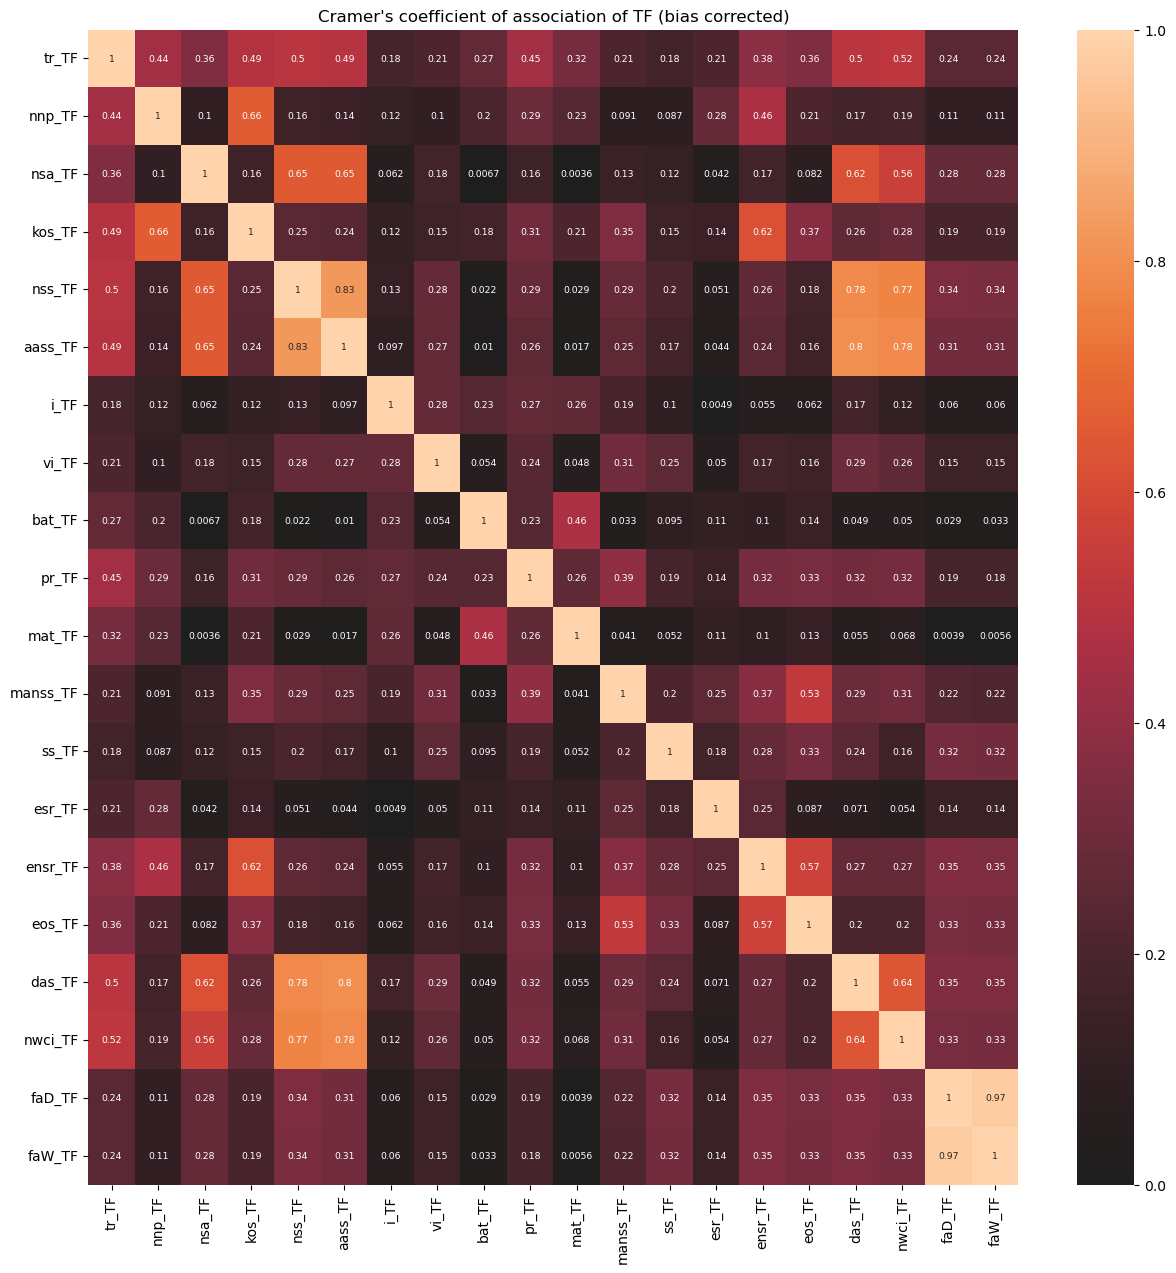

In [94]:
sns.heatmap(df_cramer_corrected,vmax=1,vmin=0,center=0,annot=True,annot_kws={"size": 30 / np.sqrt(len(df_TF.corr()))},)
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Cramer's coefficient of association of TF (bias corrected)")
plt.plot()
plt.savefig("tf_cramer.png")
plt.show()

In [95]:
# cross tabulation
col1 = "bat_TF"
col2 = "i_TF"
pd.crosstab(df_TF[col1],df_TF[col2])

i_TF,0,1
bat_TF,,
0,96013,1244
1,18395,2421


(118073, 20)
            tr_TF   nnp_TF    nsa_TF   kos_TF   nss_TF  aass_TF     i_TF  \
tr_TF    1.00e+00 4.44e-01  3.57e-01 4.85e-01 5.03e-01 4.93e-01 1.80e-01   
nnp_TF   4.44e-01 1.00e+00  1.04e-01 6.62e-01 1.61e-01 1.44e-01 1.18e-01   
nsa_TF   3.57e-01 1.04e-01  1.00e+00 1.58e-01 6.52e-01 6.54e-01 6.25e-02   
kos_TF   4.85e-01 6.62e-01  1.58e-01 1.00e+00 2.48e-01 2.36e-01 1.15e-01   
nss_TF   5.03e-01 1.61e-01  6.52e-01 2.48e-01 1.00e+00 8.25e-01 1.29e-01   
aass_TF  4.93e-01 1.44e-01  6.54e-01 2.36e-01 8.25e-01 1.00e+00 9.68e-02   
i_TF     1.80e-01 1.18e-01  6.25e-02 1.15e-01 1.29e-01 9.68e-02 1.00e+00   
vi_TF    2.07e-01 1.04e-01  1.78e-01 1.55e-01 2.76e-01 2.68e-01 2.79e-01   
bat_TF   2.71e-01 1.96e-01 -7.30e-03 1.78e-01 2.23e-02 1.04e-02 2.27e-01   
pr_TF    4.45e-01 2.95e-01  1.56e-01 3.07e-01 2.87e-01 2.57e-01 2.73e-01   
mat_TF   3.23e-01 2.27e-01 -4.61e-03 2.06e-01 2.87e-02 1.76e-02 2.63e-01   
manss_TF 2.09e-01 9.14e-02  1.34e-01 3.50e-01 2.85e-01 2.54e-01 1.88e-01   

<AxesSubplot:>

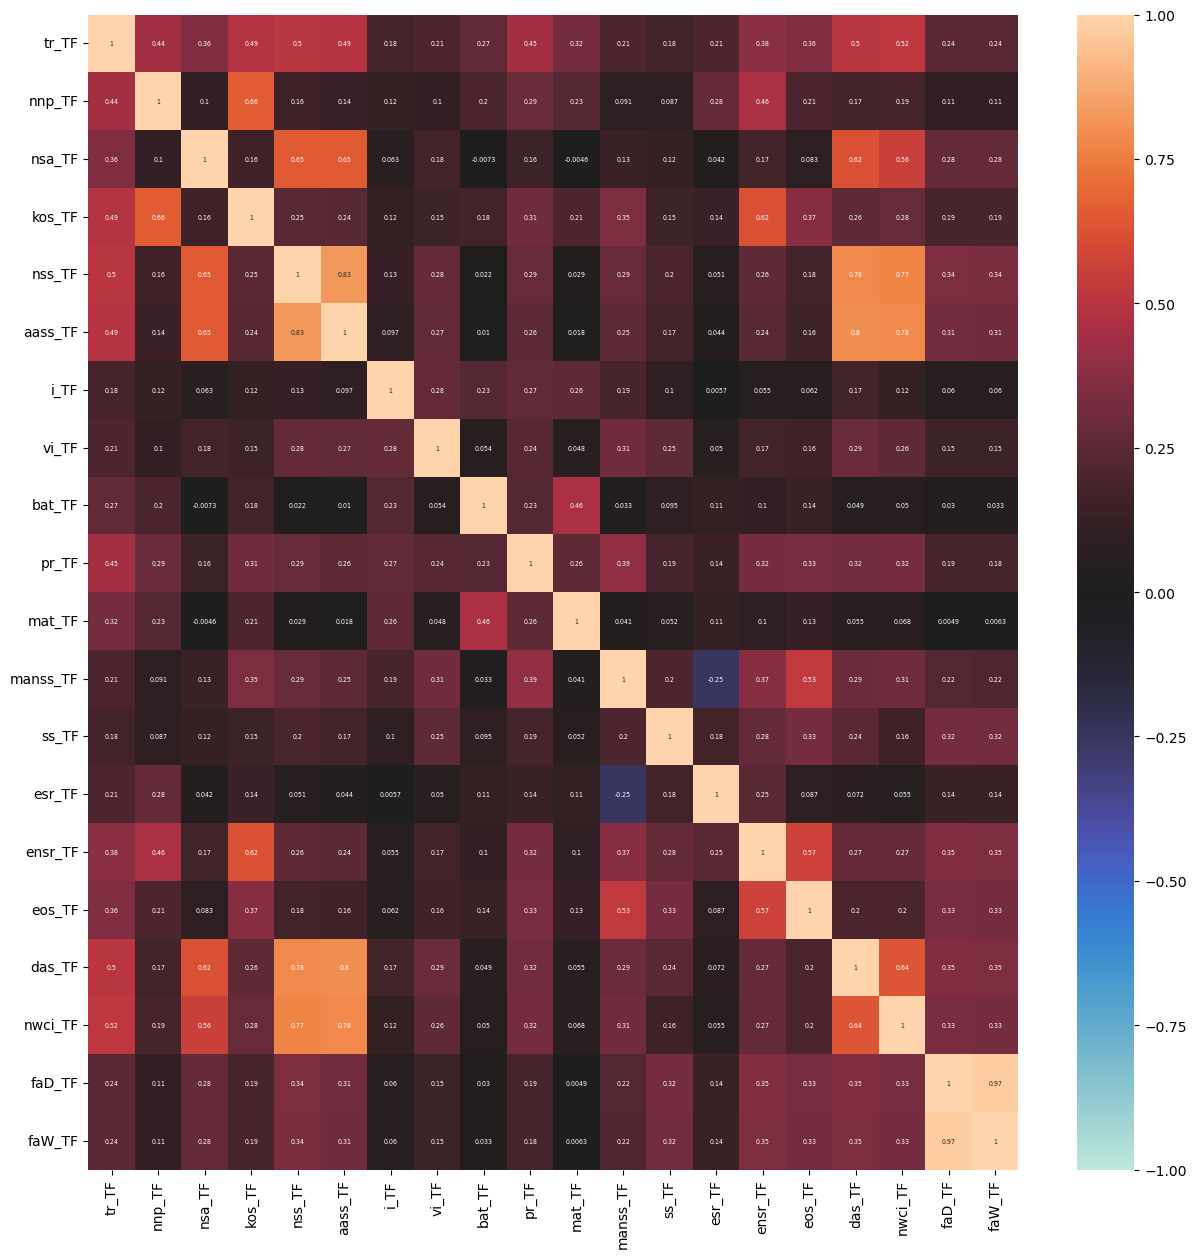

In [96]:
#ファイ係数
print(df_TF.shape)
print(df_TF.corr())
sns.heatmap(df_TF.corr(),vmax=1,vmin=-1,center=0,annot=True,annot_kws={"size": 20 / np.sqrt(len(df_TF.corr()))},)

# Turn a dataframe into an image

In [97]:
def df2image(df_saved,name = "output.png"):
    import dataframe_image as dfi
    print("saving")
    dfi.export(df_saved,name,max_cols = -1)
    return

# Find out the computation time for the data computed by subPC.
(The difference in PC specs is taken into account.)

In [98]:
def group_by_describe(col_name ,df):
    df2image(df[[c + "_time" for c in constraints_names] + [col_name]].groupby(col_name).describe(),f"group_by_{col_name}.png")
    return

#  time consuming
# for col in model_info:
#     if col == "num_edges": continue
#     print(col,"start")
#     group_by_describe(col,df)


df_sub = pd.read_csv("./subPC_time_data1.csv")
print(df_sub.shape)

for name in constraints_names:
    df[f"{name}_TF"] = df[f"{name}_TF"] * 1

df_sub = df_sub[df_sub["Themes_size"] < 4]
df_sub = df_sub[df_sub["num_nodes"] % 3 == 0]

print(df_sub.shape)
df_sub.describe()

(118073, 50)
(25633, 50)


,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04,2.56e+04
mean,3.07e+00,2.07e+00,5.25e+00,2.18e+00,3.07e+00,1.32e+01,1.68e+00,2.00e+00,2.61e+00,4.98e-01,1.14e-05,6.37e-06,2.70e-06,3.15e-06,5.60e-06,1.56e-03,9.50e-04,2.18e-06,1.72e-03,5.55e-03,1.00e-03,4.72e-03,9.25e-03,5.33e-02,4.96e-02,1.02e-01,2.17e-03,5.57e-03,3.33e+00,1.30e+00
std,2.45e+00,8.62e-01,2.49e+00,1.59e+00,2.45e+00,1.53e+01,7.75e-01,8.15e-01,9.68e-01,2.69e-01,1.10e-05,2.63e-06,7.19e-07,1.64e-06,6.67e-06,4.71e-03,1.73e-03,6.38e-07,2.47e-03,1.16e-02,2.73e-03,9.53e-03,1.50e-02,2.48e-01,2.29e-01,4.02e-01,4.48e-03,1.64e-02,2.16e+01,6.94e+00
min,0.00e+00,1.00e+00,3.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.67e-06,1.67e-06,7.15e-07,7.15e-07,7.15e-07,7.15e-07,2.62e-06,7.15e-07,1.67e-06,9.06e-06,4.77e-06,6.91e-06,4.77e-06,5.72e-06,5.01e-06,7.15e-06,1.19e-06,7.15e-07,-6.49e-01,6.68e-06
25%,1.00e+00,1.00e+00,3.00e+00,1.00e+00,1.00e+00,3.00e+00,1.00e+00,1.00e+00,2.00e+00,3.75e-01,5.96e-06,4.77e-06,2.15e-06,1.91e-06,2.15e-06,4.03e-05,8.99e-05,1.91e-06,4.51e-05,1.54e-04,9.78e-06,4.51e-05,3.20e-04,2.41e-05,5.32e-05,4.22e-04,1.04e-04,3.10e-05,1.20e-03,6.50e-04
50%,3.00e+00,2.00e+00,3.00e+00,2.00e+00,3.00e+00,8.00e+00,1.00e+00,2.00e+00,3.00e+00,5.00e-01,7.87e-06,5.96e-06,2.86e-06,3.10e-06,2.86e-06,1.23e-04,2.46e-04,2.15e-06,6.53e-04,9.99e-04,1.88e-05,7.53e-04,2.61e-03,2.17e-04,5.68e-04,3.29e-03,2.90e-04,1.84e-04,1.25e-02,1.15e-02
75%,5.00e+00,3.00e+00,9.00e+00,3.00e+00,5.00e+00,1.80e+01,2.00e+00,3.00e+00,3.00e+00,6.25e-01,1.29e-05,7.87e-06,3.10e-06,4.05e-06,7.15e-06,5.93e-04,9.56e-04,2.15e-06,2.38e-03,5.33e-03,5.58e-04,4.72e-03,1.14e-02,6.05e-03,9.28e-03,3.38e-02,1.87e-03,3.10e-03,3.10e-01,2.49e-01
max,9.00e+00,3.00e+00,9.00e+00,7.00e+00,9.00e+00,8.10e+01,3.00e+00,3.00e+00,4.00e+00,1.00e+00,1.07e-04,4.12e-05,1.79e-05,2.48e-05,8.18e-05,8.80e-02,2.14e-02,1.62e-05,4.88e-02,1.82e-01,4.40e-02,9.66e-02,1.52e-01,4.29e+00,5.40e+00,1.25e+01,9.67e-02,7.34e-01,8.31e+02,2.60e+02


In [99]:
def describe_projection_by_constraints(df,constraints):
    df_reduced = df.copy()
    for c in ["count","%","std","min"]:
        for col in df_reduced.columns:
            if c in col[1] or (col[0][0:col[0].find("_")] ) not in constraints:
                df_reduced = df_reduced.drop(col,axis=1)
    return df_reduced

In [100]:
pd.options.display.float_format = '{:.2e}'.format

constraints = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]
    

def groupby_describe_TF(df,group=["Themes_size"]):
    describe_tab_TF = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    return describe_tab_TF

 
describe_tab_TF = groupby_describe_TF(df_sub,["num_nodes","Themes_size","num_propvar"])

projected = describe_projection_by_constraints(describe_tab_TF,constraints)
tex = projected.to_latex()

print(tex)

projected

\begin{tabular}{lllrrrrrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{esr\_time} & \multicolumn{2}{l}{ensr\_time} & \multicolumn{2}{l}{eos\_time} & \multicolumn{2}{l}{das\_time} & \multicolumn{2}{l}{nwci\_time} & \multicolumn{2}{l}{faD\_time} & \multicolumn{2}{l}{faW\_time} \\
  &   &   &     mean &      max &      mean &      max &     mean &      max &     mean &      max &      mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &           &          &          &          &          &          &           &          &          &          &          &          \\
\midrule
3 & 1 & 1 & 4.73e-04 & 6.34e-03 &  4.49e-04 & 6.04e-03 & 7.20e-04 & 1.17e-02 & 1.67e-04 & 1.40e-03 &  5.19e-04 & 8.77e-03 & 6.30e-03 & 1.13e-01 & 5.48e-03 & 9.30e-02 \\
  &   & 2 & 3.74e-03 & 5.69e-02 &  4.00e-03 & 5.12e-02 & 7.02e-03 & 9.80e-02 & 7.64e-04 & 9.95e-03 &  3.03e-03 & 4.65e-02 & 1.25e-01 & 2.48e+00 & 1.09e-01 & 2.47e+00 \\
 

esr_time          ensr_time           \
                                      mean      max      mean      max   
num_nodes Themes_size num_propvar                                        
3         1           1           4.73e-04 6.34e-03  4.49e-04 6.04e-03   
                      2           3.74e-03 5.69e-02  4.00e-03 5.12e-02   
                      3           1.64e-02 2.15e-01  1.84e-02 2.31e-01   
          2           1           4.24e-04 9.84e-03  4.35e-04 7.92e-03   
                      2           5.43e-03 1.94e-01  6.90e-03 1.81e-01   
                      3           3.76e-02 5.67e-01  4.48e-02 7.22e-01   
          3           1           1.07e-03 1.71e-02  2.12e-04 1.12e-02   
                      2           2.06e-02 4.51e-01  5.02e-03 3.66e-01   
                      3           4.34e-01 4.29e+00  5.71e-02 3.02e+00   
6         1           1           2.01e-04 3.71e-03  5.48e-04 6.47e-03   
                      2           2.05e-03 4.57e-02  5.83e-03 1.22e-01   
                      3           6.59e-03 1.52e-01  2.54e-02 3.20e-01   
          2           1           4.18e-04 5.97e-03  9.29e-04 1.33e-02   
                      2           6.55e-03 1.29e-01  1.62e-02 2.75e-01   
                      3           4.14e-02 7.34e-01  1.09e-01 1.82e+00   
          3           1           6.58e-04 1.09e-02  1.06e-03 1.03e-02   
                      2           1.12e-02 2.70e-01  1.98e-02 4.30e-01   
                      3           1.82e-01 3.27e+00  3.93e-01 4.35e+00   
9         1           1           3.08e-04 4.97e-03  9.51e-04 7.39e-03   
                      2           2.82e-03 5.78e-02  1.05e-02 1.25e-01   
                      3           1.26e-02 2.57e-01  5.69e-02 7.19e-01   
          2           1           4.83e-04 7.69e-03  1.37e-03 2.04e-02   
                      2           6.89e-03 1.31e-01  1.89e-02 3.08e-01   
                      3           4.70e-02 1.07e+00  1.99e-01 2.37e+00   
          3           1           6.01e-04 1.13e-02  1.43e-03 1.80e-02   
                      2           1.24e-02 4.37e-01  2.94e-02 5.79e-01   
                      3           2.04e-01 3.38e+00  5.21e-01 5.40e+00   

                                  eos_time          das_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           7.20e-04 1.17e-02 1.67e-04 1.40e-03   
                      2           7.02e-03 9.80e-02 7.64e-04 9.95e-03   
                      3           3.15e-02 4.15e-01 3.43e-03 3.97e-02   
          2           1           1.21e-03 1.04e-02 1.91e-04 1.17e-03   
                      2           1.84e-02 2.06e-01 8.37e-04 9.18e-03   
                      3           1.74e-01 1.70e+00 3.72e-03 2.97e-02   
          3           1           4.74e-04 1.08e-02 2.00e-04 1.49e-03   
                      2           9.90e-03 3.04e-01 1.03e-03 1.39e-02   
                      3           1.82e-01 5.90e+00 4.50e-03 3.94e-02   
6         1           1           1.64e-03 1.89e-02 2.04e-04 1.47e-03   
                      2           1.89e-02 1.98e-01 1.18e-03 1.01e-02   
                      3           9.97e-02 9.52e-01 5.41e-03 4.36e-02   
          2           1           1.81e-03 1.61e-02 2.24e-04 1.49e-03   
                      2           3.03e-02 3.70e-01 1.25e-03 8.77e-03   
                      3           3.07e-01 2.96e+00 6.56e-03 9.67e-02   
          3           1           1.61e-03 1.37e-02 2.40e-04 1.66e-03   
                      2           2.91e-02 5.48e-01 1.46e-03 4.16e-02   
                      3           6.35e-01 7.11e+00 6.40e-03 5.07e-02   
9         1           1           2.25e-03 1.99e-02 2.09e-04 1.55e-03   
                      2           2.44e-02 2.27e-01 1.29e-03 8.54e-03   
                      3           1.49e-01 1.13e+00 5.73e-03 3.95e-02   
          2           1           2.82e-03 3.77e-02 2.57e-04 

# Classify data by TF for each constraint and then tabulate computation time.

In [101]:
# case True
def groupby_describe_T(df,group=["Themes_size","num_propvar"]):
    describe_tab_T = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_T.columns:
        if col[1] in drop_col:
            describe_tab_T = describe_tab_T.drop(col,axis=1)
    

    for col in describe_tab_T.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_T.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] > 0.5].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_T.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_T
    
print(df_sub.shape)
describe_tab_T = groupby_describe_T(df_sub,["num_nodes","Themes_size","num_propvar"])

# describe_tab_T = describe_tab.copy()

# print(describe_tab_T.index)

# for col in describe_tab_T.columns:
#     print(col)
#     name = col[0][:col[0].find("_")]
#     kind = col[1]
#     print(name)
#     for row in describe_tab_T.index:
# #         print(row)
        
#         df_limited = df_sub[df_sub[name + "_TF"] > 0.5]
#         df_limited = df_limited[df_limited["Themes_size"] == row]
        
#         df_limited = df_limited.describe()
        
# #         print(df_limited)
        
#         describe_tab_T.loc[row,col] = df_limited.loc[kind,name + "_time"]
    
# describe_tab_T

(25633, 50)
('tr_time', 'mean')
tr
('tr_time', 'max')
tr
('nnp_time', 'mean')
nnp
('nnp_time', 'max')
nnp
('nsa_time', 'mean')
nsa
('nsa_time', 'max')
nsa
('kos_time', 'mean')
kos
('kos_time', 'max')
kos
('nss_time', 'mean')
nss
('nss_time', 'max')
nss
('aass_time', 'mean')
aass
('aass_time', 'max')
aass
('i_time', 'mean')
i
('i_time', 'max')
i
('vi_time', 'mean')
vi
('vi_time', 'max')
vi
('bat_time', 'mean')
bat
('bat_time', 'max')
bat
('pr_time', 'mean')
pr
('pr_time', 'max')
pr
('mat_time', 'mean')
mat
('mat_time', 'max')
mat
('manss_time', 'mean')
manss
('manss_time', 'max')
manss
('ss_time', 'mean')
ss
('ss_time', 'max')
ss
('esr_time', 'mean')
esr
('esr_time', 'max')
esr
('ensr_time', 'mean')
ensr
('ensr_time', 'max')
ensr
('eos_time', 'mean')
eos
('eos_time', 'max')
eos
('das_time', 'mean')
das
('das_time', 'max')
das
('nwci_time', 'mean')
nwci
('nwci_time', 'max')
nwci
('faD_time', 'mean')
faD
('faD_time', 'max')
faD
('faW_time', 'mean')
faW
('faW_time', 'max')
faW


In [64]:
pd.options.display.float_format = '{:.2e}'.format

constraints = [
    
    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

describe_tab_Treduced = describe_projection_by_constraints(describe_tab_T,constraints)
s = describe_tab_Treduced.to_latex()

print(s)
describe_tab_Treduced

\begin{tabular}{lllrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{tr\_time} & \multicolumn{2}{l}{nnp\_time} & \multicolumn{2}{l}{nsa\_time} & \multicolumn{2}{l}{kos\_time} & \multicolumn{2}{l}{nss\_time} & \multicolumn{2}{l}{aass\_time} & \multicolumn{2}{l}{i\_time} & \multicolumn{2}{l}{vi\_time} & \multicolumn{2}{l}{bat\_time} & \multicolumn{2}{l}{pr\_time} & \multicolumn{2}{l}{mat\_time} & \multicolumn{2}{l}{manss\_time} & \multicolumn{2}{l}{ss\_time} & \multicolumn{2}{l}{esr\_time} & \multicolumn{2}{l}{ensr\_time} & \multicolumn{2}{l}{eos\_time} & \multicolumn{2}{l}{das\_time} & \multicolumn{2}{l}{nwci\_time} & \multicolumn{2}{l}{faD\_time} & \multicolumn{2}{l}{faW\_time} \\
  &   &   &     mean &      max &     mean &      max &     mean &      max &     mean &      max &     mean &      max &      mean &      max &     mean &      max &     mean &      max &     mean &      max &     mean &      max &     mean &      max &       mean &      max &

tr_time          nnp_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           9.41e-06 2.60e-05 5.16e-06 1.69e-05   
                      2           9.43e-06 2.12e-05 5.19e-06 1.79e-05   
                      3           9.81e-06 2.91e-05 5.27e-06 1.12e-05   
          2           1           5.93e-06 1.62e-05 4.11e-06 1.10e-05   
                      2           5.96e-06 1.38e-05 4.24e-06 8.82e-06   
                      3           6.84e-06 2.29e-05 4.66e-06 4.12e-05   
          3           1           6.17e-06 2.00e-05 5.30e-06 1.31e-05   
                      2           6.97e-06 2.19e-05 5.55e-06 2.00e-05   
                      3           7.69e-06 2.38e-05 6.02e-06 1.31e-05   
6         1           1           1.84e-05 5.08e-05 5.57e-06 1.00e-05   
                      2           1.93e-05 5.41e-05 5.89e-06 9.30e-06   
                      3           1.92e-05 4.70e-05 5.87e-06 1.22e-05   
          2           1           9.72e-06 3.67e-05 5.83e-06 1.31e-05   
                      2           8.96e-06 3.91e-05 5.87e-06 1.31e-05   
                      3           1.04e-05 3.60e-05 6.41e-06 1.53e-05   
          3           1           7.15e-06 3.58e-05 6.04e-06 1.22e-05   
                      2           8.34e-06 3.60e-05 6.58e-06 1.57e-05   
                      3           9.32e-06 3.91e-05 7.10e-06 1.50e-05   
9         1           1           3.50e-05 9.11e-05 8.05e-06 1.38e-05   
                      2           3.63e-05 1.02e-04 8.12e-06 1.69e-05   
                      3           3.94e-05 1.07e-04 8.55e-06 1.57e-05   
          2           1           9.50e-06 5.89e-05 6.93e-06 1.31e-05   
                      2           9.70e-06 3.70e-05 7.29e-06 1.60e-05   
                      3           9.64e-06 3.19e-05 8.29e-06 1.81e-05   
          3           1           6.24e-06 1.41e-05 6.61e-06 1.62e-05   
                      2           9.49e-06 4.98e-05 7.47e-06 1.88e-05   
                      3           8.29e-06 3.22e-05 8.53e-06 2.19e-05   

                                  nsa_time          kos_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           2.30e-06 4.77e-06 2.90e-06 8.82e-06   
                      2           2.35e-06 8.34e-06 2.90e-06 8.82e-06   
                      3           2.43e-06 5.96e-06 2.98e-06 1.10e-05   
          2           1           2.30e-06 4.05e-06 2.00e-06 9.06e-06   
                      2           2.36e-06 5.01e-06 2.04e-06 5.96e-06   
                      3           2.51e-06 5.96e-06 2.19e-06 6.91e-06   
          3           1           2.32e-06 5.25e-06 1.54e-06 5.96e-06   
                      2           2.41e-06 5.25e-06 1.59e-06 1.00e-05   
                      3           2.53e-06 5.25e-06 1.61e-06 1.22e-05   
6         1           1           2.76e-06 5.96e-06 3.36e-06 9.06e-06   
                      2           2.90e-06 5.25e-06 3.48e-06 7.87e-06   
                      3           2.75e-06 8.11e-06 3.49e-06 7.15e-06   
          2           1           2.79e-06 4.29e-06 3.13e-06 8.11e-06   
                      2           2.85e-06 5.25e-06 3.08e-06 7.15e-06   
                      3           3.02e-06 5.72e-06 3.28e-06 1.62e-05   
          3           1           2.85e-06 4.29e-06 3.01e-06 9.06e-06   
                      2           2.94e-06 5.96e-06 3.02e-06 7.15e-06   
                      3           3.08e-06 5.96e-06 3.38e-06 8.82e-06   
9         1           1           3.27e-06 5.01e-06 4.94e-06 9.06e-06   
                      2           3.27e-06 5.25e-06 4.92e-06 1.29e-05   
                      3           3.36e-06 5.96e-06 5.06e-06 9.06e-06   
          2           1           3.32e-06 6.91e-06 3.80e-06 8.11e-06   
                   

In [102]:
def groupby_describe_F(df,group=["Themes_size","num_propvar"]):
    describe_tab_F = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_F.columns:
        if col[1] in drop_col:
            describe_tab_F = describe_tab_F.drop(col,axis=1)
    

    for col in describe_tab_F.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_F.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] < 0.5].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_F.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_F
    
print(df_sub.shape)
describe_tab_F = groupby_describe_F(df_sub,["num_nodes","Themes_size","num_propvar"])


# describe_tab_F = describe_tab.copy()

# print(describe_tab_F.index)

# for col in describe_tab_F.columns:
#     print(col)
#     name = col[0][:col[0].find("_")]
#     kind = col[1]
#     print(name)
#     for row in describe_tab_F.index:
# #         print(row)
        
#         df_limited = df_sub[df_sub[name + "_TF"] < 0.5]
#         df_limited = df_limited[df_limited["Themes_size"] == row]
        
#         df_limited = df_limited.describe()
        
# #         print(df_limited)
        
#         describe_tab_F.loc[row,col] = df_limited.loc[kind,name + "_time"]
    
# describe_tab_F

(25633, 50)
('tr_time', 'mean')
tr
('tr_time', 'max')
tr
('nnp_time', 'mean')
nnp
('nnp_time', 'max')
nnp
('nsa_time', 'mean')
nsa
('nsa_time', 'max')
nsa
('kos_time', 'mean')
kos
('kos_time', 'max')
kos
('nss_time', 'mean')
nss
('nss_time', 'max')
nss
('aass_time', 'mean')
aass
('aass_time', 'max')
aass
('i_time', 'mean')
i
('i_time', 'max')
i
('vi_time', 'mean')
vi
('vi_time', 'max')
vi
('bat_time', 'mean')
bat
('bat_time', 'max')
bat
('pr_time', 'mean')
pr
('pr_time', 'max')
pr
('mat_time', 'mean')
mat
('mat_time', 'max')
mat
('manss_time', 'mean')
manss
('manss_time', 'max')
manss
('ss_time', 'mean')
ss
('ss_time', 'max')
ss
('esr_time', 'mean')
esr
('esr_time', 'max')
esr
('ensr_time', 'mean')
ensr
('ensr_time', 'max')
ensr
('eos_time', 'mean')
eos
('eos_time', 'max')
eos
('das_time', 'mean')
das
('das_time', 'max')
das
('nwci_time', 'mean')
nwci
('nwci_time', 'max')
nwci
('faD_time', 'mean')
faD
('faD_time', 'max')
faD
('faW_time', 'mean')
faW
('faW_time', 'max')
faW


In [40]:
pd.options.display.float_format = '{:.2e}'.format

cols = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

describe_tab_Freduced =  describe_projection_by_constraints(describe_tab_F,cols)
s = describe_tab_Freduced.to_latex()

print(s)
describe_tab_Freduced

\begin{tabular}{lllrrrrrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{esr\_time} & \multicolumn{2}{l}{ensr\_time} & \multicolumn{2}{l}{eos\_time} & \multicolumn{2}{l}{das\_time} & \multicolumn{2}{l}{nwci\_time} & \multicolumn{2}{l}{faD\_time} & \multicolumn{2}{l}{faW\_time} \\
  &   &   &     mean &      max &      mean &      max &     mean &      max &     mean &      max &      mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &           &          &          &          &          &          &           &          &          &          &          &          \\
\midrule
3 & 1 & 1 & 6.01e-04 & 3.30e-03 &  5.61e-04 & 4.01e-03 & 7.42e-04 & 6.01e-03 & 2.08e-04 & 1.40e-03 &  2.68e-04 & 5.35e-03 & 3.66e-03 & 3.52e-02 & 3.51e-03 & 3.51e-02 \\
  &   & 2 & 3.14e-03 & 2.72e-02 &  3.32e-03 & 3.11e-02 & 4.93e-03 & 6.57e-02 & 9.83e-04 & 9.95e-03 &  1.11e-03 & 2.37e-02 & 3.06e-02 & 4.20e-01 & 3.32e-02 & 4.13e-01 \\
 

esr_time          ensr_time           \
                                      mean      max      mean      max   
num_nodes Themes_size num_propvar                                        
3         1           1           6.01e-04 3.30e-03  5.61e-04 4.01e-03   
                      2           3.14e-03 2.72e-02  3.32e-03 3.11e-02   
                      3           8.10e-03 4.35e-02  6.87e-03 3.06e-02   
          2           1           8.61e-04 4.26e-03  7.78e-04 6.10e-03   
                      2           8.72e-03 7.59e-02  1.01e-02 8.63e-02   
                      3           3.80e-02 2.82e-01  2.78e-02 1.33e-01   
          3           1           1.36e-03 1.26e-02  8.05e-04 4.91e-03   
                      2           2.22e-02 3.04e-01  1.76e-02 3.28e-01   
                      3           2.80e-01 2.60e+00  1.34e-01 2.03e+00   
6         1           1           6.24e-04 3.32e-03  6.68e-04 3.77e-03   
                      2           4.74e-03 2.57e-02  4.73e-03 3.43e-02   
                      3           6.75e-03 1.42e-02  1.05e-02 5.71e-02   
          2           1           8.63e-04 5.78e-03  1.12e-03 1.33e-02   
                      2           1.08e-02 8.99e-02  1.41e-02 1.58e-01   
                      3           2.71e-02 1.71e-01  3.75e-02 2.33e-01   
          3           1           1.09e-03 6.68e-03  1.26e-03 1.03e-02   
                      2           1.74e-02 1.85e-01  2.19e-02 4.30e-01   
                      3           2.18e-01 3.26e+00  2.31e-01 2.54e+00   
9         1           1           5.94e-04 3.15e-03  1.07e-03 5.78e-03   
                      2           3.49e-03 1.82e-02  7.17e-03 8.08e-02   
                      3           6.46e-03 2.24e-02  1.93e-02 1.24e-01   
          2           1           8.63e-04 7.17e-03  1.54e-03 2.04e-02   
                      2           8.99e-03 1.16e-01  1.42e-02 1.29e-01   
                      3           4.06e-02 4.16e-01  1.10e-01 1.57e+00   
          3           1           1.04e-03 8.38e-03  1.58e-03 1.80e-02   
                      2           1.86e-02 2.30e-01  2.97e-02 5.18e-01   
                      3           1.92e-01 2.13e+00  3.51e-01 3.06e+00   

                                  eos_time          das_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           7.42e-04 6.01e-03 2.08e-04 1.40e-03   
                      2           4.93e-03 6.57e-02 9.83e-04 9.95e-03   
                      3           9.74e-03 5.73e-02 4.44e-03 3.97e-02   
          2           1           1.10e-03 1.04e-02 2.33e-04 1.17e-03   
                      2           1.38e-02 2.06e-01 1.14e-03 9.18e-03   
                      3           6.83e-02 1.04e+00 4.83e-03 2.97e-02   
          3           1           1.12e-03 1.08e-02 2.37e-04 1.49e-03   
                      2           2.05e-02 3.04e-01 1.23e-03 1.39e-02   
                      3           1.70e-01 2.77e+00 5.44e-03 3.94e-02   
6         1           1           1.38e-03 6.92e-03 2.24e-04 1.47e-03   
                      2           9.75e-03 1.02e-01 1.28e-03 1.01e-02   
                      3           3.95e-02 2.46e-01 5.83e-03 4.36e-02   
          2           1           1.73e-03 1.61e-02 2.36e-04 1.49e-03   
                      2           2.16e-02 3.70e-01 1.34e-03 8.77e-03   
                      3           1.02e-01 1.24e+00 7.05e-03 9.67e-02   
          3           1           1.59e-03 1.37e-02 2.53e-04 1.66e-03   
                      2           2.55e-02 5.48e-01 1.56e-03 4.16e-02   
                      3           3.41e-01 2.71e+00 6.73e-03 5.07e-02   
9         1           1           1.88e-03 1.24e-02 2.17e-04 1.55e-03   
                      2           1.35e-02 1.26e-01 1.34e-03 8.54e-03   
                      3           4.83e-02 2.27e-01 5.97e-03 3.95e-02   
          2           1           2.58e-03 3.37e-02 2.64e-04 

In [41]:
def groupby_describe_TF(df,group=["Themes_size","num_propvar"]):
    describe_tab_TF = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_TF.columns:
        if col[1] in drop_col:
            describe_tab_TF = describe_tab_TF.drop(col,axis=1)
    

    for col in describe_tab_TF.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_TF.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] > -1.0].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_TF.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_TF
    
print(df_sub.shape)
describe_tab_TF = groupby_describe_TF(df_sub,["num_nodes","Themes_size","num_propvar"])

(25633, 50)
('tr_time', 'mean')
tr
('tr_time', 'max')
tr
('nnp_time', 'mean')
nnp
('nnp_time', 'max')
nnp
('nsa_time', 'mean')
nsa
('nsa_time', 'max')
nsa
('kos_time', 'mean')
kos
('kos_time', 'max')
kos
('nss_time', 'mean')
nss
('nss_time', 'max')
nss
('aass_time', 'mean')
aass
('aass_time', 'max')
aass
('i_time', 'mean')
i
('i_time', 'max')
i
('vi_time', 'mean')
vi
('vi_time', 'max')
vi
('bat_time', 'mean')
bat
('bat_time', 'max')
bat
('pr_time', 'mean')
pr
('pr_time', 'max')
pr
('mat_time', 'mean')
mat
('mat_time', 'max')
mat
('manss_time', 'mean')
manss
('manss_time', 'max')
manss
('ss_time', 'mean')
ss
('ss_time', 'max')
ss
('esr_time', 'mean')
esr
('esr_time', 'max')
esr
('ensr_time', 'mean')
ensr
('ensr_time', 'max')
ensr
('eos_time', 'mean')
eos
('eos_time', 'max')
eos
('das_time', 'mean')
das
('das_time', 'max')
das
('nwci_time', 'mean')
nwci
('nwci_time', 'max')
nwci
('faD_time', 'mean')
faD
('faD_time', 'max')
faD
('faW_time', 'mean')
faW
('faW_time', 'max')
faW


In [42]:
pd.options.display.float_format = '{:.2e}'.format

cols = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

describe_tab_TFreduced =  describe_projection_by_constraints(describe_tab_TF,cols)
s = describe_tab_TFreduced.to_latex()

print(s)
describe_tab_TFreduced

\begin{tabular}{lllrrrrrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{esr\_time} & \multicolumn{2}{l}{ensr\_time} & \multicolumn{2}{l}{eos\_time} & \multicolumn{2}{l}{das\_time} & \multicolumn{2}{l}{nwci\_time} & \multicolumn{2}{l}{faD\_time} & \multicolumn{2}{l}{faW\_time} \\
  &   &   &     mean &      max &      mean &      max &     mean &      max &     mean &      max &      mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &           &          &          &          &          &          &           &          &          &          &          &          \\
\midrule
3 & 1 & 1 & 4.73e-04 & 6.34e-03 &  4.49e-04 & 6.04e-03 & 7.20e-04 & 1.17e-02 & 1.67e-04 & 1.40e-03 &  5.19e-04 & 8.77e-03 & 6.30e-03 & 1.13e-01 & 5.48e-03 & 9.30e-02 \\
  &   & 2 & 3.74e-03 & 5.69e-02 &  4.00e-03 & 5.12e-02 & 7.02e-03 & 9.80e-02 & 7.64e-04 & 9.95e-03 &  3.03e-03 & 4.65e-02 & 1.25e-01 & 2.48e+00 & 1.09e-01 & 2.47e+00 \\
 

esr_time          ensr_time           \
                                      mean      max      mean      max   
num_nodes Themes_size num_propvar                                        
3         1           1           4.73e-04 6.34e-03  4.49e-04 6.04e-03   
                      2           3.74e-03 5.69e-02  4.00e-03 5.12e-02   
                      3           1.64e-02 2.15e-01  1.84e-02 2.31e-01   
          2           1           4.24e-04 9.84e-03  4.35e-04 7.92e-03   
                      2           5.43e-03 1.94e-01  6.90e-03 1.81e-01   
                      3           3.76e-02 5.67e-01  4.48e-02 7.22e-01   
          3           1           1.07e-03 1.71e-02  2.12e-04 1.12e-02   
                      2           2.06e-02 4.51e-01  5.02e-03 3.66e-01   
                      3           4.34e-01 4.29e+00  5.71e-02 3.02e+00   
6         1           1           2.01e-04 3.71e-03  5.48e-04 6.47e-03   
                      2           2.05e-03 4.57e-02  5.83e-03 1.22e-01   
                      3           6.59e-03 1.52e-01  2.54e-02 3.20e-01   
          2           1           4.18e-04 5.97e-03  9.29e-04 1.33e-02   
                      2           6.55e-03 1.29e-01  1.62e-02 2.75e-01   
                      3           4.14e-02 7.34e-01  1.09e-01 1.82e+00   
          3           1           6.58e-04 1.09e-02  1.06e-03 1.03e-02   
                      2           1.12e-02 2.70e-01  1.98e-02 4.30e-01   
                      3           1.82e-01 3.27e+00  3.93e-01 4.35e+00   
9         1           1           3.08e-04 4.97e-03  9.51e-04 7.39e-03   
                      2           2.82e-03 5.78e-02  1.05e-02 1.25e-01   
                      3           1.26e-02 2.57e-01  5.69e-02 7.19e-01   
          2           1           4.83e-04 7.69e-03  1.37e-03 2.04e-02   
                      2           6.89e-03 1.31e-01  1.89e-02 3.08e-01   
                      3           4.70e-02 1.07e+00  1.99e-01 2.37e+00   
          3           1           6.01e-04 1.13e-02  1.43e-03 1.80e-02   
                      2           1.24e-02 4.37e-01  2.94e-02 5.79e-01   
                      3           2.04e-01 3.38e+00  5.21e-01 5.40e+00   

                                  eos_time          das_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           7.20e-04 1.17e-02 1.67e-04 1.40e-03   
                      2           7.02e-03 9.80e-02 7.64e-04 9.95e-03   
                      3           3.15e-02 4.15e-01 3.43e-03 3.97e-02   
          2           1           1.21e-03 1.04e-02 1.91e-04 1.17e-03   
                      2           1.84e-02 2.06e-01 8.37e-04 9.18e-03   
                      3           1.74e-01 1.70e+00 3.72e-03 2.97e-02   
          3           1           4.74e-04 1.08e-02 2.00e-04 1.49e-03   
                      2           9.90e-03 3.04e-01 1.03e-03 1.39e-02   
                      3           1.82e-01 5.90e+00 4.50e-03 3.94e-02   
6         1           1           1.64e-03 1.89e-02 2.04e-04 1.47e-03   
                      2           1.89e-02 1.98e-01 1.18e-03 1.01e-02   
                      3           9.97e-02 9.52e-01 5.41e-03 4.36e-02   
          2           1           1.81e-03 1.61e-02 2.24e-04 1.49e-03   
                      2           3.03e-02 3.70e-01 1.25e-03 8.77e-03   
                      3           3.07e-01 2.96e+00 6.56e-03 9.67e-02   
          3           1           1.61e-03 1.37e-02 2.40e-04 1.66e-03   
                      2           2.91e-02 5.48e-01 1.46e-03 4.16e-02   
                      3           6.35e-01 7.11e+00 6.40e-03 5.07e-02   
9         1           1           2.25e-03 1.99e-02 2.09e-04 1.55e-03   
                      2           2.44e-02 2.27e-01 1.29e-03 8.54e-03   
                      3           1.49e-01 1.13e+00 5.73e-03 3.95e-02   
          2           1           2.82e-03 3.77e-02 2.57e-04 

# Checking for the establishment of the theorem on the satisfaction of constraints

In [43]:
import numpy as np

In [44]:
# constraints_names = [
#        'tr', 
#     'nnp',
#        'nsa', 
#     'kos',
#     'nss',
#     'aass',
#     'i',
#     'vi',
#        'bat',
#     'pr',
#     'mat',
#        'manss',
#     'ss',
#     'esr',
#        'ensr',
#     'eos',
#     'das',
#     'nwci',
#     'faD',
#     'faW',
# ]

antecedent = [
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
]

consequent =  [
    'tr', 
    'nnp',
    'nsa', 
    'kos',
    
#     'nss',
#     "faW",
#     "faD",
#     "esr",
#     "eos",
]




In [55]:
df_meet_antecedent = df[df["Aord_size"]  > 0].copy()
print(df_meet_antecedent.shape)

for c in antecedent:
    print(c)
    df_meet_antecedent = df_meet_antecedent[df_meet_antecedent[f"{c}_TF"] > 0.5].copy()
    print(df_meet_antecedent.shape)

print("checked antecedent")
print("shape:",df_meet_antecedent.shape)

df_meet_consequent = df_meet_antecedent.copy()
    
for c in consequent:
    print(c)
    df_meet_consequent = df_meet_consequent[df_meet_consequent[f"{c}_TF"] > 0.5].copy()
    print(df_meet_consequent.shape)

print("shape:",df_meet_consequent.shape)

assert(df_meet_consequent.shape == df_meet_antecedent.shape)


(94236, 50)
aass
(14770, 50)
i
(755, 50)
vi
(412, 50)
bat
(207, 50)
pr
(191, 50)
mat
(121, 50)
manss
(121, 50)
ss
(91, 50)
checked antecedent
shape: (91, 50)
tr
(91, 50)
nnp
(91, 50)
nsa
(91, 50)
kos
(91, 50)
shape: (91, 50)


In [46]:
df_meet_antecedent.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01,9.10e+01
mean,1.09e+00,1.03e+00,1.22e+00,1.32e-01,1.09e+00,3.30e-02,1.02e+00,2.01e+00,1.80e+00,7.39e-01,2.60e-06,1.00e+00,2.61e-06,1.00e+00,1.80e-06,1.00e+00,1.24e-06,1.00e+00,1.34e-06,9.89e-01,2.17e-05,1.00e+00,8.20e-06,1.00e+00,1.74e-06,1.00e+00,2.62e-06,1.00e+00,1.13e-04,1.00e+00,9.60e-06,1.00e+00,1.00e-04,1.00e+00,5.22e-04,1.00e+00,8.19e-06,1.00e+00,6.78e-06,1.00e+00,2.65e-04,8.46e-01,1.84e-05,9.89e-01,2.31e-05,1.00e+00,1.53e-04,1.00e+00,2.66e-05,1.00e+00
std,3.21e-01,1.80e-01,4.67e-01,3.40e-01,3.21e-01,2.33e-01,1.47e-01,7.82e-01,8.33e-01,3.55e-01,7.62e-07,0.00e+00,9.66e-07,0.00e+00,4.51e-07,0.00e+00,6.72e-07,0.00e+00,5.29e-07,1.05e-01,1.87e-04,0.00e+00,8.47e-06,0.00e+00,5.37e-07,0.00e+00,5.25e-07,0.00e+00,4.30e-04,0.00e+00,4.63e-06,0.00e+00,4.07e-04,0.00e+00,1.18e-03,0.00e+00,6.93e-06,0.00e+00,5.02e-06,0.00e+00,1.08e-03,3.63e-01,1.48e-04,1.05e-01,2.06e-04,0.00e+00,2.26e-04,0.00e+00,2.09e-04,0.00e+00
min,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.67e-06,1.00e+00,1.67e-06,1.00e+00,7.15e-07,1.00e+00,7.15e-07,1.00e+00,7.15e-07,0.00e+00,7.15e-07,1.00e+00,3.81e-06,1.00e+00,7.15e-07,1.00e+00,1.67e-06,1.00e+00,9.78e-06,1.00e+00,5.72e-06,1.00e+00,5.72e-06,1.00e+00,1.67e-06,1.00e+00,5.01e-06,1.00e+00,4.77e-06,1.00e+00,9.06e-06,0.00e+00,9.54e-07,0.00e+00,7.15e-07,1.00e+00,1.06e-04,1.00e+00,3.10e-06,1.00e+00
25%,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,1.00e+00,1.00e+00,5.00e-01,2.15e-06,1.00e+00,1.91e-06,1.00e+00,1.67e-06,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,5.01e-06,1.00e+00,1.19e-06,1.00e+00,2.15e-06,1.00e+00,1.10e-05,1.00e+00,6.20e-06,1.00e+00,6.20e-06,1.00e+00,2.86e-06,1.00e+00,5.96e-06,1.00e+00,5.01e-06,1.00e+00,1.26e-05,1.00e+00,1.91e-06,1.00e+00,9.54e-07,1.00e+00,1.10e-04,1.00e+00,4.05e-06,1.00e+00
50%,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,2.00e+00,2.00e+00,1.00e+00,2.62e-06,1.00e+00,2.15e-06,1.00e+00,1.91e-06,1.00e+00,9.54e-07,1.00e+00,1.19e-06,1.00e+00,9.54e-07,1.00e+00,5.72e-06,1.00e+00,1.91e-06,1.00e+00,2.86e-06,1.00e+00,1.19e-05,1.00e+00,7.15e-06,1.00e+00,7.15e-06,1.00e+00,3.10e-06,1.00e+00,6.20e-06,1.00e+00,5.72e-06,1.00e+00,1.31e-05,1.00e+00,2.15e-06,1.00e+00,1.19e-06,1.00e+00,1.12e-04,1.00e+00,4.05e-06,1.00e+00
75%,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,3.00e+00,2.00e+00,1.00e+00,3.10e-06,1.00e+00,3.10e-06,1.00e+00,2.15e-06,1.00e+00,1.19e-06,1.00e+00,1.91e-06,1.00e+00,1.19e-06,1.00e+00,9.89e-06,1.00e+00,2.15e-06,1.00e+00,3.10e-06,1.00e+00,2.91e-05,1.00e+00,1.20e-05,1.00e+00,1.79e-05,1.00e+00,6.08e-04,1.00e+00,7.87e-06,1.00e+00,6.20e-06,1.00e+00,3.90e-05,1.00e+00,2.15e-06,1.00e+00,1.91e-06,1.00e+00,1.18e-04,1.00e+00,5.25e-06,1.00e+00
max,3.00e+00,2.00e+00,3.00e+00,1.00e+00,3.00e+00,2.00e+00,2.00e+00,3.00e+00,4.00e+00,1.00e+00,7.15e-06,1.00e+00,6.91e-06,1.00e+00,3.10e-06,1.00e+00,4.05e-06,1.00e+00,3.10e-06,1.00e+00,1.78e-03,1.00e+00,8.01e-05,1.00e+00,4.05e-06,1.00e+00,4.29e-06,1.00e+00,2.91e-03,1.00e+00,2.57e-05,1.00e+00,2.68e-03,1.00e+00,6.86e-03,1.00e+00,5.20e-05,1.00e+00,4.79e-05,1.00e

In [47]:
df_meet_antecedent[df_meet_antecedent["num_propvar"] == 2]

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
3031,1,1,1,0,1,0,1,2,2,1.00e+00,3.10e-06,1,2.15e-06,1,9.54e-07,1,9.54e-07,1,2.15e-06,1,9.54e-07,1,1.00e-05,1,2.15e-06,1,2.62e-06,1,2.84e-05,1,1.29e-05,1,1.72e-05,1,1.15e-03,1,8.11e-06,1,6.20e-06,1,1.57e-05,0,2.15e-06,1,9.54e-07,1,1.14e-04,1,4.05e-06,1
3574,1,1,2,1,1,0,1,2,2,5.00e-01,3.10e-06,1,3.81e-06,1,2.15e-06,1,3.10e-06,1,1.91e-06,1,1.91e-06,1,1.31e-05,1,1.91e-06,1,4.29e-06,1,3.50e-05,1,1.00e-05,1,1.91e-05,1,1.14e-03,1,8.34e-06,1,1.38e-05,1,4.72e-05,1,1.91e-06,1,9.54e-07,1,1.91e-04,1,7.87e-06,1
4005,1,1,1,0,1,0,1,2,1,0.00e+00,2.86e-06,1,2.15e-06,1,9.54e-07,1,9.54e-07,1,9.54e-07,1,9.54e-07,1,4.05e-06,1,1.19e-06,1,2.86e-06,1,1.00e-05,1,6.20e-06,1,5.96e-06,1,3.10e-06,1,5.72e-06,1,6.20e-06,1,1.31e-05,1,1.67e-06,1,2.15e-06,1,1.10e-04,1,3.81e-06,1
4016,2,1,2,0,2,0,1,2,2,0.00e+00,2.86e-06,1,1.91e-06,1,1.91e-06,1,1.19e-06,1,1.67e-06,1,2.15e-06,1,7.87e-06,1,2.15e-06,1,2.15e-06,1,1.41e-05,1,6.20e-06,1,6.91e-06,1,5.25e-06,1,5.72e-06,1,5.96e-06,1,2.00e-05,1,1.91e-06,1,1.91e-06,1,1.98e-04,1,6.20e-06,1
10144,1,1,2,1,1,0,1,2,2,1.00e+00,1.91e-06,1,4.05e-06,1,1.91e-06,1,3.10e-06,1,9.54e-07,1,1.19e-06,1,1.26e-05,1,2.15e-06,1,2.15e-06,1,3.41e-05,1,1.29e-05,1,1.91e-05,1,6.47e-04,1,6.91e-06,1,1.41e-05,1,1.38e-05,0,2.15e-06,1,9.54e-07,1,1.85e-04,1,5.96e-06,1
20378,1,1,2,1,1,2,1,2,2,5.00e-01,7.15e-06,1,2.86e-06,1,3.10e-06,1,9.54e-07,1,3.10e-06,0,1.78e-03,1,1.60e-05,1,1.67e-06,1,3.10e-06,1,3.89e-05,1,1.00e-05,1,1.84e-05,1,1.73e-03,1,5.20e-05,1,6.91e-06,1,4.20e-05,1,1.42e-03,0,1.97e-03,1,2.26e-03,1,1.99e-03,1
27003,1,1,2,1,1,0,1,2,2,5.00e-01,1.91e-06,1,4.77e-06,1,2.15e-06,1,3.10e-06,1,9.54e-07,1,9.54e-07,1,1.41e-05,1,2.15e-06,1,2.15e-06,1,4.48e-05,1,9.06e-06,1,2.81e-05,1,1.34e-03,1,8.11e-06,1,4.79e-05,1,4.32e-05,1,1.91e-06,1,9.54e-07,1,1.91e-04,1,6.91e-06,1
33134,1,1,1,0,1,0,1,2,3,1.00e+00,3.10e-06,1,2.15e-06,1,1.91e-06,1,9.54e-07,1,2.15e-06,1,9.54e-07,1,8.11e-06,1,9.54e-07,1,2.15e-06,1,2.91e-05,1,1.10e-05,1,1.69e-05,1,6.84e-04,1,7.87e-06,1,5.01e-06,1,4.12e-04,1,3.10e-06,1,1.67e-06,1,1.11e-04,1,4.29e-06,1
33752,1,1,1,0,1,0,1,2,1,0.00e+00,2.15e-06,1,3.10e-06,1,2.15e-06,1,7.15e-07,1,1.19e-06,1,9.54e-07,1,5.25e-06,1,1.67e-06,1,3.10e-06,1,1.12e-05,1,6.91e-06,1,5.96e-06,1,2.86e-06,1,5.96e-06,1,5.01e-06,1,1.31e-05,1,1.91e-06,1,2.15e-06,1,1.10e-04,1,4.05e-06,1
39564,1,1,1,0,1,0,1,2,2,5.00e-01,2.15e-06,1,1.91e-06,1,1.91e-06,1,1.19e-06,1,9.54e-07,1,1.91e-06,1,5.01e-06,1,1.19e-06,1,2.86e-06,1,1.10e-05,1,1.10e-05,1,6.20e-06,1,2.86e-06,1,5.25e-06,1,5.01e-06,1,1.29e-05,1,9.54e-07,1,9.54e-07,1,1.12e-04,1,4.05e-06,1


In [48]:
df_counter_example = df_meet_antecedent[df_meet_antecedent["nsa_TF"] < 0.5]

In [49]:
df_counter_example

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF


<AxesSubplot:>

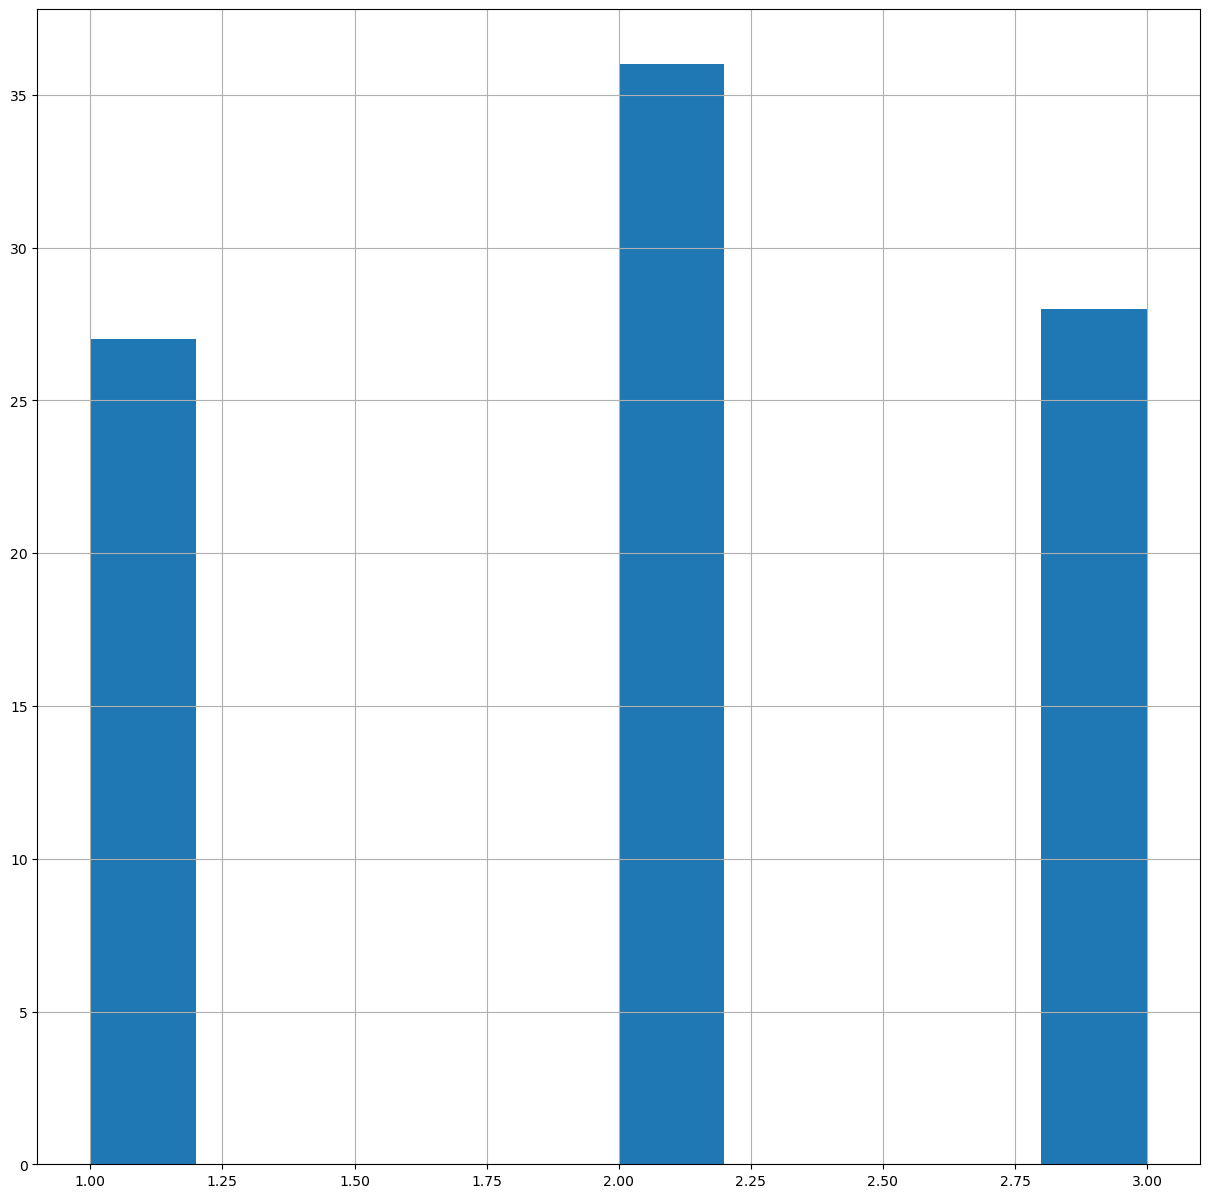

In [50]:
df_meet_consequent["num_propvar"].hist()

In [51]:
df.query("bat_TF > 0.5")

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
1,2,1,5,3,2,25,1,3,4,5.00e-01,3.50e-05,1,7.87e-06,1,3.10e-06,0,5.01e-06,1,8.82e-06,0,3.92e-04,0,1.53e-03,0,2.86e-06,0,4.05e-06,1,3.65e-03,0,1.00e-05,1,2.64e-02,0,4.12e-02,0,7.83e-03,1,4.14e-02,1,1.28e-02,1,3.75e-04,0,2.57e-02,0,1.60e+01,1,1.39e+01,1
6,2,2,8,6,2,18,2,1,3,1.00e+00,2.69e-05,1,1.31e-05,1,3.10e-06,0,6.91e-06,1,2.15e-06,0,9.39e-05,0,4.01e-05,1,9.54e-07,0,2.86e-06,1,4.49e-04,0,1.50e-05,1,6.94e-04,0,6.90e-04,0,1.69e-05,0,9.33e-04,0,5.32e-04,0,4.48e-04,0,8.70e-05,0,2.00e-02,0,1.33e-02,0
11,1,1,1,0,1,0,1,2,3,1.00e+00,2.15e-06,1,2.15e-06,1,1.91e-06,1,9.54e-07,1,9.54e-07,1,9.54e-07,1,3.48e-04,0,1.67e-06,0,3.10e-06,1,1.92e-03,1,1.19e-05,1,2.16e-03,0,1.30e-03,0,8.82e-06,1,4.77e-06,1,1.06e-03,0,2.62e-06,1,2.15e-06,1,1.05e-04,1,4.05e-06,1
27,9,1,10,1,9,67,1,3,3,1.00e+00,9.01e-05,1,8.11e-06,1,2.86e-06,0,4.29e-06,1,2.86e-06,0,3.69e-04,0,1.22e-03,0,2.15e-06,0,3.81e-06,1,1.55e-02,0,2.31e-05,1,1.59e-02,0,6.91e-02,1,1.50e-05,1,1.06e-02,1,2.65e-02,0,3.78e-04,0,5.56e-03,0,2.23e+01,1,1.07e+01,1
44,1,1,3,2,1,2,1,3,3,1.00e+00,6.20e-06,1,5.96e-06,1,1.91e-06,0,3.10e-06,1,1.00e-05,1,1.14e-04,0,1.91e-05,1,2.15e-06,1,1.91e-06,1,3.41e-05,1,2.41e-05,1,1.88e-05,1,2.13e-03,1,1.69e-05,1,1.62e-05,1,2.10e-05,0,1.33e-04,0,1.91e-03,1,3.24e-04,1,1.60e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118041,4,1,7,3,4,37,1,2,2,5.00e-01,4.10e-05,1,8.11e-06,1,2.15e-06,0,5.96e-06,1,2.86e-06,0,6.20e-06,0,5.25e-06,0,2.15e-06,0,2.86e-06,1,7.32e-05,0,1.29e-05,1,7.83e-04,0,4.51e-03,1,1.00e-05,1,9.18e-05,1,6.89e-05,1,5.39e-05,0,5.25e-06,0,9.40e-02,1,4.19e-02,1
118046,3,1,3,0,3,0,1,2,3,1.00e+00,3.10e-06,1,2.15e-06,1,1.67e-06,1,9.54e-07,1,2.15e-06,1,9.54e-07,1,1.06e-04,0,2.15e-06,0,2.86e-06,1,4.78e-03,1,8.11e-06,0,2.07e-03,0,7.90e-04,0,1.00e-05,1,5.96e-06,1,1.35e-03,0,3.10e-06,1,2.15e-06,1,2.80e-04,1,9.06e-06,1
118053,3,1,7,4,3,41,1,1,3,1.00e+00,4.63e-05,1,9.06e-06,1,1.91e-06,0,5.96e-06,1,9.06e-06,0,1.96e-03,0,2.19e-05,1,9.54e-07,0,1.67e-06,1,5.16e-04,0,7.87e-06,1,9.92e-04,0,7.53e-04,0,1.02e-03,0,6.79e-04,0,7.97e-04,0,3.28e-04,0,8.01e-04,0,2.33e-03,0,6.69e-04,0
118059,0,1,1,1,0,1,1,2,0,5.00e-01,5.25e-06,1,3.10e-06,1,1.91e-06,0,9.54e-07,1,3.10e-06,0,6.91e-06,0,4.05e-06,1,1.91e-06,1,2.86e-06,1,1.41e-05,1,5.96e-06,1,6.20e-06,1,2.86e-06,1,1.41e-05,1,6.20e-06,1,5.72e-06,1,5.25e-06,1,4.77e-06,0,1.26e-04,1,5.96e-06,1


In [52]:
df.shape

(118073, 50)

In [62]:
df.query("num_propvar >= 3").query("bit_representation_ratio < 0.3").describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03,7.50e+03
mean,2.76e+00,1.97e+00,4.75e+00,1.99e+00,2.76e+00,1.23e+01,1.59e+00,3.00e+00,2.65e+00,1.38e-01,1.10e-05,5.47e-01,6.35e-06,7.36e-01,2.70e-06,3.74e-01,3.00e-06,7.62e-01,5.14e-06,2.57e-01,2.98e-03,2.05e-01,2.83e-03,1.36e-02,2.17e-06,7.52e-02,4.55e-03,5.46e-02,1.17e-02,2.39e-01,4.38e-03,1.23e-01,1.02e-02,2.21e-01,2.12e-02,5.30e-01,1.96e-01,9.67e-01,2.37e-01,9.68e-01,4.83e-01,9.40e-01,4.35e-03,2.61e-01,1.13e-02,2.99e-01,9.46e+00,9.83e-01,3.49e+00,9.85e-01
std,2.50e+00,8.55e-01,2.88e+00,1.73e+00,2.50e+00,1.60e+01,7.11e-01,0.00e+00,1.02e+00,1.21e-01,1.10e-05,4.98e-01,3.24e-06,4.41e-01,8.29e-07,4.84e-01,1.85e-06,4.26e-01,6.52e-06,4.37e-01,7.62e-03,4.04e-01,2.90e-03,1.16e-01,6.87e-07,2.64e-01,2.85e-03,2.27e-01,1.59e-02,4.27e-01,5.57e-03,3.29e-01,1.39e-02,4.15e-01,1.82e-02,4.99e-01,7.33e-01,1.78e-01,8.07e-01,1.77e-01,1.21e+00,2.37e-01,6.27e-03,4.39e-01,2.68e-02,4.58e-01,4.39e+01,1.30e-01,1.33e+01,1.23e-01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,3.00e+00,0.00e+00,0.00e+00,1.67e-06,0.00e+00,1.67e-06,0.00e+00,7.15e-07,0.00e+00,0.00e+00,0.00e+00,7.15e-07,0.00e+00,7.15e-07,0.00e+00,2.62e-06,0.00e+00,7.15e-07,0.00e+00,1.67e-06,0.00e+00,1.03e-05,0.00e+00,5.72e-06,0.00e+00,4.77e-06,0.00e+00,1.91e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,9.54e-07,0.00e+00,7.15e-07,0.00e+00,-6.49e-01,0.00e+00,3.81e-06,0.00e+00
25%,1.00e+00,1.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,3.00e+00,2.00e+00,0.00e+00,5.25e-06,0.00e+00,3.81e-06,0.00e+00,2.15e-06,0.00e+00,1.19e-06,1.00e+00,1.91e-06,0.00e+00,6.91e-06,0.00e+00,6.20e-06,0.00e+00,1.91e-06,0.00e+00,2.58e-03,0.00e+00,1.71e-03,0.00e+00,1.93e-05,0.00e+00,3.10e-05,0.00e+00,8.06e-03,0.00e+00,2.19e-05,1.00e+00,1.69e-05,1.00e+00,2.95e-03,1.00e+00,7.30e-05,0.00e+00,5.01e-06,0.00e+00,4.09e-04,1.00e+00,1.10e-05,1.00e+00
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,1.00e+00,3.00e+00,3.00e+00,2.50e-01,7.87e-06,1.00e+00,5.72e-06,1.00e+00,2.86e-06,0.00e+00,2.86e-06,1.00e+00,2.86e-06,0.00e+00,1.40e-04,0.00e+00,2.30e-03,0.00e+00,2.15e-06,0.00e+00,3.79e-03,0.00e+00,5.89e-03,0.00e+00,2.49e-03,0.00e+00,4.46e-03,0.00e+00,1.62e-02,1.00e+00,6.81e-03,1.00e+00,2.80e-03,1.00e+00,9.87e-02,1.00e+00,6.03e-04,0.00e+00,1.80e-04,0.00e+00,1.65e-01,1.00e+00,1.17e-01,1.00e+00
75%,4.00e+00,2.00e+00,7.00e+00,3.00e+00,4.00e+00,1.70e+01,2.00e+00,3.00e+00,3.00e+00,2.50e-01,1.22e-05,1.00e+00,8.11e-06,1.00e+00,3.10e-06,1.00e+00,4.05e-06,1.00e+00,5.96e-06,1.00e+00,9.09e-04,0.00e+00,4.72e-03,0.00e+00,2.62e-06,0.00e+00,6.25e-03,0.00e+00,1.61e-02,0.00e+00,6.80e-03,0.00e+00,1.47e-02,0.00e+00,2.97e-02,1.00e+00,1.10e-01,1.00e+00,1.42e-01,1.00e+00,4.23e-01,1.00e+00,7.00e-03,1.00e+00,1.34e-02,1.00e+00,2.38e+00,1.00e+00,1.52e+00,1.00e+00
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.10e+01,4.00e+00,3.00e+00,4.00e+00,2.50e-01,1.07e-04,1.00e+00,2.31e-05,1.00e+00,1.62e-05,1.00e+00,1.91e-05,1.00e+00,7.30e-05,1.00e+00,1.44e-01,1.00e+00,1.99e-02,1.00e+00,8.11e-06,1.00e+00,3.51e-02,1.00e+00,1.84e-01,1.00e+00,4.40e-02,1.00e+00,1.07e-01,1.00e+00,2.43e-01,1.00e+00,2.20e+01,1.00e+00,1.89e+01,1.00

In [63]:
df.query("num_propvar >= 3").query("bit_representation_ratio > 0.7").describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,bit_representation_ratio,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03,7.24e+03
mean,2.80e+00,1.95e+00,4.82e+00,2.02e+00,2.80e+00,1.23e+01,1.58e+00,3.00e+00,2.97e+00,8.63e-01,1.13e-05,5.53e-01,6.42e-06,7.33e-01,2.71e-06,3.74e-01,3.05e-06,7.65e-01,5.15e-06,2.54e-01,2.95e-03,2.02e-01,1.25e-03,4.69e-02,2.31e-06,7.19e-02,2.14e-03,5.67e-01,1.18e-02,2.39e-01,5.63e-04,1.98e-01,1.04e-02,2.20e-01,2.15e-02,5.30e-01,4.59e-02,8.23e-01,5.52e-02,8.06e-01,9.84e-02,6.77e-01,4.56e-03,2.62e-01,1.10e-02,2.88e-01,9.56e+00,9.82e-01,3.54e+00,9.85e-01
std,2.51e+00,8.55e-01,2.88e+00,1.71e+00,2.51e+00,1.60e+01,7.08e-01,0.00e+00,7.40e-01,1.21e-01,1.18e-05,4.97e-01,3.25e-06,4.42e-01,8.25e-07,4.84e-01,1.84e-06,4.24e-01,6.47e-06,4.35e-01,7.26e-03,4.02e-01,1.60e-03,2.12e-01,6.01e-07,2.58e-01,3.05e-03,4.96e-01,1.59e-02,4.26e-01,1.97e-03,3.98e-01,1.39e-02,4.14e-01,1.85e-02,4.99e-01,1.59e-01,3.82e-01,2.13e-01,3.96e-01,2.44e-01,4.68e-01,6.49e-03,4.40e-01,2.55e-02,4.53e-01,4.47e+01,1.33e-01,1.47e+01,1.20e-01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,3.00e+00,0.00e+00,7.50e-01,1.67e-06,0.00e+00,1.67e-06,0.00e+00,7.15e-07,0.00e+00,0.00e+00,0.00e+00,7.15e-07,0.00e+00,7.15e-07,0.00e+00,2.86e-06,0.00e+00,7.15e-07,0.00e+00,1.67e-06,0.00e+00,9.78e-06,0.00e+00,5.25e-06,0.00e+00,4.77e-06,0.00e+00,1.91e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,9.54e-07,0.00e+00,7.15e-07,0.00e+00,1.06e-04,0.00e+00,3.81e-06,0.00e+00
25%,1.00e+00,1.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,3.00e+00,3.00e+00,7.50e-01,5.25e-06,0.00e+00,4.05e-06,0.00e+00,2.15e-06,0.00e+00,1.19e-06,1.00e+00,1.91e-06,0.00e+00,6.91e-06,0.00e+00,6.54e-04,0.00e+00,1.91e-06,0.00e+00,3.81e-06,0.00e+00,1.73e-03,0.00e+00,1.19e-05,0.00e+00,3.00e-05,0.00e+00,8.06e-03,0.00e+00,2.31e-05,1.00e+00,1.79e-05,1.00e+00,2.65e-03,0.00e+00,7.30e-05,0.00e+00,5.01e-06,0.00e+00,4.25e-04,1.00e+00,1.12e-05,1.00e+00
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,1.00e+00,3.00e+00,3.00e+00,7.50e-01,7.87e-06,1.00e+00,5.96e-06,1.00e+00,2.86e-06,0.00e+00,3.10e-06,1.00e+00,2.86e-06,0.00e+00,1.44e-04,0.00e+00,8.64e-04,0.00e+00,2.15e-06,0.00e+00,5.01e-06,1.00e+00,6.02e-03,0.00e+00,1.60e-05,0.00e+00,4.81e-03,0.00e+00,1.63e-02,1.00e+00,2.67e-03,1.00e+00,2.75e-03,1.00e+00,2.15e-02,1.00e+00,7.22e-04,0.00e+00,1.74e-04,0.00e+00,1.75e-01,1.00e+00,1.32e-01,1.00e+00
75%,4.00e+00,2.00e+00,7.00e+00,3.00e+00,4.00e+00,1.80e+01,2.00e+00,3.00e+00,3.00e+00,1.00e+00,1.22e-05,1.00e+00,8.34e-06,1.00e+00,3.10e-06,1.00e+00,4.29e-06,1.00e+00,5.96e-06,1.00e+00,1.03e-03,0.00e+00,1.10e-03,0.00e+00,2.86e-06,0.00e+00,3.59e-03,1.00e+00,1.64e-02,0.00e+00,2.41e-05,0.00e+00,1.50e-02,0.00e+00,2.92e-02,1.00e+00,2.51e-02,1.00e+00,2.90e-02,1.00e+00,7.41e-02,1.00e+00,7.34e-03,1.00e+00,1.31e-02,1.00e+00,2.52e+00,1.00e+00,1.59e+00,1.00e+00
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.70e+01,4.00e+00,3.00e+00,4.00e+00,1.00e+00,1.18e-04,1.00e+00,4.12e-05,1.00e+00,1.81e-05,1.00e+00,2.19e-05,1.00e+00,7.32e-05,1.00e+00,1.15e-01,1.00e+00,1.37e-02,1.00e+00,7.87e-06,1.00e+00,1.52e-02,1.00e+00,1.50e-01,1.00e+00,2.11e-02,1.00e+00,1.15e-01,1.00e+00,1.92e-01,1.00e+00,3.83e+00,1.00e+00,1.06e+01,1.00e